<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S5E2 - Backpack Prices**

In [ ]:
# Necessry to run LGBMRegressor
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd

In [ ]:
%%capture
!pip install -qq pytorch_tabnet
!pip install optuna
!pip install catboost
#!pip install optuna-integration-pytorch-tabnet

!pip install tensorflow --upgrade
!pip install keras --upgrade

#from pytorch_tabnet.tab_model import TabNetRegressor

!pip install --upgrade category-encoders
!pip install optuna-integration
!pip install colorama
#!pip install pyfiglet
!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install --upgrade scikit-learn
!pip install scikit-lego
!pip install skops

#from pytorch_tabnet.tab_model import TabNetRegressor

In [ ]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
#import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder
from category_encoders import TargetEncoder

warnings.filterwarnings('ignore')
#import pyfiglet
#plt.style.use('fivethirtyeight')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
#         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# import font colors
from colorama import Fore, Style, init

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

init(autoreset=True)

<Figure size 960x660 with 0 Axes>

In [ ]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#A8DADC; color:#1D3557; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.2);">
    <h3>Loading and Preprocessing Data for Compatibility</h3>
</div>


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/X_enc_ext.csv",index_col=0)

df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/test_enc_ext.csv",index_col=0)

# df_train_orig = pd.read_csv(
#     '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/credit_risk_dataset.csv'
# )

df_subm = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/sample_submission.csv",index_col=0)

# df_orig = pd.read_csv(
#     "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Insurance Premium Prediction Dataset.csv",
#      parse_dates=['Policy Start Date'],
#     #     index_col='id',
# )

In [ ]:
df_train.head()
df_train.shape,df_test.shape

((3994318, 31), (200000, 30))

In [ ]:
#df_train_orig.isna().sum()
df_train.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Weight Capacity (kg)_missing,Mat_Siz_Col,Siz_Lap_Col,Bra_Siz_Wat,Siz_Lap_Wat,Mat_Lap_Wat,Bra_Siz_Sty,Bra_Lap_Wat,Siz_Com_Lap,Siz_Lap_Sty,Mat_Com_Lap,Mat_Siz_Com,Bra_Siz_Com,Com_Lap_Wat,Bra_Siz_Lap,Bra_Mat_Siz,Siz_Com_Wat,Siz_Com_Sty,TE_wc,skew_0,skew_1,Price
0,1,1,1,7,2,1,3,0,-0.917722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.261445,-0.292388,-0.428820,112.15875
1,1,0,3,1,2,2,1,3,1.300573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.621130,-0.302957,-0.460902,68.88056
2,5,1,3,2,2,1,1,6,-0.196013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016408,-0.301780,-1.112454,39.17320
3,3,3,3,8,2,1,1,3,-0.727615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.498987,-0.301780,-0.551413,80.60793
4,0,0,1,0,2,2,1,3,-0.037447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016408,-0.375870,0.519525,86.02312


In [ ]:
def plot_scatter(x="Price",y="TE_wc", df=df_train):

  plt.figure(figsize=(5,5))
  plt.scatter(df[x],df[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

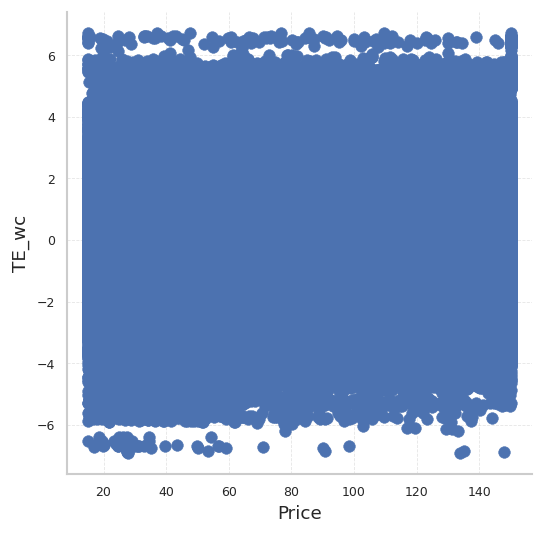

In [ ]:
plot_scatter(x="Price",y="TE_wc")

In [ ]:
#df_train["person_emp_length"].describe()

In [ ]:
#df_train[df_train["cb_person_cred_hist_length"]>0.75*df_train["person_age"]]
#np.round(df_train["cb_person_cred_hist_length"].mean(),0).astype(int)

**Descriptions of Loan Data**

Descriptions for the column names based on the data provided:

* **id**: Unique identifier for each record.
* **person_age**: Age of the individual, categorized into ranges.
* **person_income**: Income of the individual, categorized into income ranges.
* **person_home_ownership**: Homeownership status, which includes categories like 'RENT', 'MORTGAGE', etc.
* **person_emp_length**: Employment length of the individual, categorized into ranges based on years.
* **loan_intent**: The purpose of the loan, with categories such as 'EDUCATION', 'MEDICAL', etc.
* **loan_grade**: The credit grade of the loan, such as 'A', 'B', etc.
* **loan_amnt**: Loan amount, categorized into ranges.
* **loan_int_rate**: Loan interest rate, categorized into percentage ranges.
* **loan_percent_income**: Percentage of the individual’s income that the loan represents, categorized into - ranges.
* **cb_person_default_on_file**: Whether the person has a history of loan default, with values 'true' or 'false'.
* **cb_person_cred_hist_length**: Length of the individual’s credit history, categorized into ranges.
* **loan_status**: with values representing whether the loan status approval( binary values)

The dataset is a about loan applications, including personal, financial, and loan details. It's likely used for predicting whether a person will default on a loan, making it a binary classification problem. The goal is to figure out which applicants are at higher risk of not paying back their loans based on their age, income, employment, loan purpose, credit history, and other related information.

In [ ]:
class Config:

    state = 42
    n_splits = 10
    early_stop = 200

    target = 'Price'
    problem = "Regression"
    train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/X_enc_ext.csv', index_col=0)
    test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/test_enc_ext.csv', index_col=0)
    submission = pd.read_csv( "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/sample_submission.csv", index_col=0)
    train_org = None

    original_data = 'N'
    outliers = 'N'
    log_trf = 'N'
    scaler_trf = 'Y'
    feature_eng = 'Y'
    missing = 'Y'
    force_normalization="N"
    impose_normalization="Y"
    trg_enc = "N"
    metric_goal="rmse"
    direction_="minimize"
    log_trans_cols = []
    force_norm_cols = []
    impose_norm_cols = ["skew_0","skew_1"]
    trg_enc_feat = []

In [ ]:
class Preprocessing():

    def __init__(self):
        self.train = Config.train
        self.test = Config.test
        self.targets = Config.target
        self.problem = Config.problem
        self.submission = Config.submission

        self.prp_data()

    def prp_data(self):

        if Config.original_data == 'Y':
            self.train = pd.concat([self.train, Config.train_org], ignore_index=True).drop_duplicates(ignore_index=True)
        if 'id' in self.train.columns:
            self.train = self.train.drop(['id'], axis=1)
            self.test = self.test.drop(['id'], axis=1)

        self.cat_features = self.train.drop(self.targets, axis=1).select_dtypes(include=['object', 'bool', 'int', 'category']).columns.tolist()
        self.num_features = self.train.drop(self.targets, axis=1).select_dtypes(exclude=['object', 'bool', 'int', 'category']).columns.tolist()

        self.train[self.cat_features] = self.train[self.cat_features].astype('category')
        self.test[self.cat_features] = self.test[self.cat_features].astype('category')

        self.train = self.reduce_mem(self.train)
        self.test = self.reduce_mem(self.test)
        return self

    def reduce_mem(self, df):

        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', "uint16", "uint32", "uint64"]

        for col in df.columns:
            col_type = df[col].dtypes

            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()

                if "int" in str(col_type):
                    if c_min >= np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min >= np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float32)
                    if c_min >= np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

        return df

In [ ]:
class EDA(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        self.data_info()
        self.heatmap()
        #self.dist_plots()
        #self.cat_feature_plots()
        #self.target_pie()

    def data_info(self):

        for data, label in zip([self.train, self.test], ['Train', 'Test']):
            table_style = [{'selector': 'th:not(.index_name)',
                            'props': [('background-color', 'slategrey'),
                                      ('color', '#FFFFFF'),
                                      ('font-weight', 'bold'),
                                      ('border', '1px solid #DCDCDC'),
                                      ('text-align', 'center')]
                            },
                            {'selector': 'tbody td',
                             'props': [('border', '1px solid #DCDCDC'),
                                       ('font-weight', 'normal')]
                            }]
            print(Style.BRIGHT+Fore.RED+f'\n{label} head\n')
            display(data.head().style.set_table_styles(table_style))

            print(Style.BRIGHT+Fore.RED+f'\n{label} info\n'+Style.RESET_ALL)
            display(data.info())

            print(Style.BRIGHT+Fore.RED+f'\n{label} describe\n')
            display(data.describe().drop(index='count', columns=self.targets, errors = 'ignore').T
                    .style.set_table_styles(table_style).format('{:.3f}'))

            print(Style.BRIGHT+Fore.RED+f'\n{label} missing values\n'+Style.RESET_ALL)
            display(data.isna().sum())
        return self

    def heatmap(self):
        print(Style.BRIGHT+Fore.RED+f'\nCorrelation Heatmap\n')
        plt.figure(figsize=(7,7))
        corr = self.train.select_dtypes(exclude=['object', 'category']).corr(method='pearson')
        sns.heatmap(corr, fmt = '0.2f', cmap = 'Blues', annot=True, cbar=False)
        plt.show()

    def dist_plots(self):

        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Numerical\n")
        df = pd.concat([self.train[self.num_features].assign(Source = 'Train'),
                        self.test[self.num_features].assign(Source = 'Test'),],
                        axis=0, ignore_index = True)

        fig, axes = plt.subplots(len(self.num_features), 2 ,figsize = (18, len(self.num_features) * 6),
                                 gridspec_kw = {'hspace': 0.3,
                                                'wspace': 0.2,
                                                'width_ratios': [0.70, 0.30]
                                               }
                                )
        for i,col in enumerate(self.num_features):
            ax = axes[i,0]
            sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source',
                        palette = ['royalblue', 'tomato'], ax = ax, alpha=0.7, linewidth = 2
                       )
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col}")
            ax.grid('--',alpha=0.7)

            ax = axes[i,1]
            sns.boxplot(data = df, y = col, x=df.Source, width = 0.5,
                        linewidth = 1, fliersize= 1,
                        ax = ax, palette=['royalblue', 'tomato']
                       )
            ax.set_title(f"\n{col}")
            ax.set(xlabel = '', ylabel = '')
            ax.tick_params(axis='both', which='major')
            ax.set_xticklabels(['Train', 'Test'])

        plt.tight_layout()
        plt.show()

    def cat_feature_plots(self):
        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Categorical\n")
        fig, axes = plt.subplots(len(self.cat_features), 2 ,figsize = (18, len(self.cat_features) * 6),
                                 gridspec_kw = {'hspace': 0.5,
                                                'wspace': 0.2,
                                               }
                                )

        for i, col in enumerate(self.cat_features):

            ax = axes[i,0]
            sns.barplot(data=self.train[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='royalblue', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Train")

            ax = axes[i,1]
            sns.barplot(data=self.test[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='tomato', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Test")

        plt.tight_layout()
        plt.show()

    def target_pie(self):
        print(Style.BRIGHT+Fore.RED+f"\nTarget feature distribution\n")
        targets = self.train[self.targets]
        plt.figure(figsize=(6, 6))
        if self.problem=="Regression":
          plt.hist(targets, bins=35, color='royalblue',alpha=0.7)
        else:
          plt.pie(targets.value_counts(), labels=targets.value_counts().index, autopct='%1.2f%%', colors=palette_9)
        plt.show()

## 1.0 EDA


Train head



,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Weight Capacity (kg)_missing,Mat_Siz_Col,Siz_Lap_Col,Bra_Siz_Wat,Siz_Lap_Wat,Mat_Lap_Wat,Bra_Siz_Sty,Bra_Lap_Wat,Siz_Com_Lap,Siz_Lap_Sty,Mat_Com_Lap,Mat_Siz_Com,Bra_Siz_Com,Com_Lap_Wat,Bra_Siz_Lap,Bra_Mat_Siz,Siz_Com_Wat,Siz_Com_Sty,TE_wc,skew_0,skew_1,Price
0,1,1,1,7,2,1,3,0,-0.917722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.261445,-0.292388,-0.428820,112.158752
1,1,0,3,1,2,2,1,3,1.300573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.621130,-0.302957,-0.460902,68.880562
2,5,1,3,2,2,1,1,6,-0.196013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016408,-0.301780,-1.112454,39.173199
3,3,3,3,8,2,1,1,3,-0.727615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.498987,-0.301780,-0.551413,80.607933
4,0,0,1,0,2,2,1,3,-0.037447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016408,-0.375870,0.519525,86.023117



Train info

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 31 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   Brand                         category
 1   Material                      category
 2   Size                          category
 3   Compartments                  category
 4   Laptop Compartment            category
 5   Waterproof                    category
 6   Style                         category
 7   Color                         category
 8   Weight Capacity (kg)          float32 
 9   Weight Capacity (kg)_missing  category
 10  Mat_Siz_Col                   category
 11  Siz_Lap_Col                   category
 12  Bra_Siz_Wat                   category
 13  Siz_Lap_Wat                   category
 14  Mat_Lap_Wat                   category
 15  Bra_Siz_Sty                   category
 16  Bra_Lap_Wat                   category
 17  Siz_Com_Lap                   category

None


Train describe



,mean,std,min,25%,50%,75%,max
Weight Capacity (kg),-0.000,0.999,-1.866,-0.852,0.006,0.857,1.720
TE_wc,0.000,0.998,-6.904,-0.471,0.016,0.451,6.732
skew_0,0.000,0.995,-16.094,-0.302,-0.062,0.176,33.648
skew_1,0.000,0.995,-23.594,-0.551,0.048,0.506,4.795



Train missing values



,0
Brand,0
Material,0
Size,0
Compartments,0
Laptop Compartment,0
Waterproof,0
Style,0
Color,0
Weight Capacity (kg),0
Weight Capacity (kg)_missing,0



Test head



,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Weight Capacity (kg)_missing,Mat_Siz_Col,Siz_Lap_Col,Bra_Siz_Wat,Siz_Lap_Wat,Mat_Lap_Wat,Bra_Siz_Sty,Bra_Lap_Wat,Siz_Com_Lap,Siz_Lap_Sty,Mat_Com_Lap,Mat_Siz_Com,Bra_Siz_Com,Com_Lap_Wat,Bra_Siz_Lap,Bra_Mat_Siz,Siz_Com_Wat,Siz_Com_Sty,TE_wc,skew_0,skew_1
0,4,1,3,2,1,1,3,3,0.381607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.414531,0.195748,0.428915
1,3,0,1,7,1,2,0,3,-0.637706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.095293,0.000521,0.040421
2,0,0,0,9,1,2,1,1,-0.889313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.164135,-0.061768,1.242390
3,0,3,0,0,2,1,1,3,0.066921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.516258,-0.295283,0.744158
4,2,3,0,2,2,2,3,0,-1.162081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016408,-0.426006,0.348637



Test info

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Brand                         200000 non-null  category
 1   Material                      200000 non-null  category
 2   Size                          200000 non-null  category
 3   Compartments                  200000 non-null  category
 4   Laptop Compartment            200000 non-null  category
 5   Waterproof                    200000 non-null  category
 6   Style                         200000 non-null  category
 7   Color                         200000 non-null  category
 8   Weight Capacity (kg)          200000 non-null  float32 
 9   Weight Capacity (kg)_missing  200000 non-null  category
 10  Mat_Siz_Col                   200000 non-null  category
 11  Siz_Lap_Col                   200000 non-null  category
 12  Bra_Siz_Wat            

None


Test describe



,mean,std,min,25%,50%,75%,max
Weight Capacity (kg),-0.002,1.000,-1.866,-0.852,0.006,0.854,1.720
TE_wc,0.000,1.000,-6.756,-0.475,0.016,0.453,6.500
skew_0,0.003,1.052,-16.094,-0.302,-0.062,0.176,33.648
skew_1,-0.001,1.009,-23.594,-0.551,0.048,0.506,4.795



Test missing values



,0
Brand,0
Material,0
Size,0
Compartments,0
Laptop Compartment,0
Waterproof,0
Style,0
Color,0
Weight Capacity (kg),0
Weight Capacity (kg)_missing,0



Correlation Heatmap



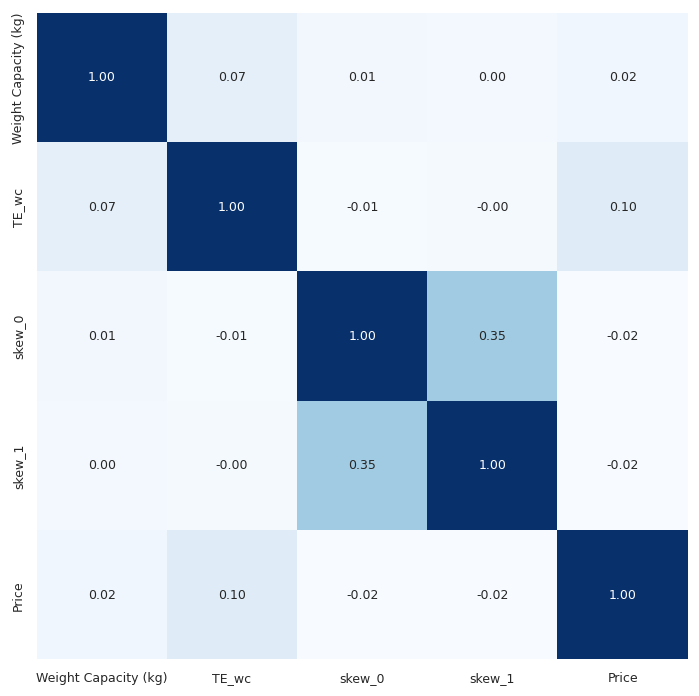

In [ ]:
eda = EDA()

## 2.0 Data Transformation and Feature Engeneering:

In [ ]:
class Transform(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        if self.missing == 'Y':
            self.missing_values()

        self.train_raw = self.train.copy()

        if self.feature_eng == 'Y':
            self.train = self.new_features(self.train)
            self.test = self.new_features(self.test)
            self.train_raw = self.new_features(self.train_raw)

        self.num_features = self.train.drop(self.target, axis=1).select_dtypes(exclude=['object', 'bool', 'category']).columns.tolist()
        self.cat_features = self.train.drop(self.target, axis=1).select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

        if self.outliers == 'Y':
            self.remove_outliers()

        if self.log_trf == 'Y':
            self.log_transformation()

        if self.force_normalization == 'Y':
            self.forced_norm_transformation()

        if self.impose_normalization == 'Y':
            self.impose_normalization_transformation()

        if self.trg_enc == 'Y':
            self.target_encoding()

        if self.scaler_trf == 'Y':
            self.scaler()

        if self.outliers == 'Y' or self.log_trf == 'Y' or self.scaler_trf =='Y':
            self.distribution()

    def __call__(self):

        self.train[self.cat_features] = self.train[self.cat_features].astype('category')
        self.test[self.cat_features] = self.test[self.cat_features].astype('category')
        data = pd.concat([self.test, self.train])
        self.train_enc, self.test_enc = self.encode(data)

        self.cat_features_card = []
        for f in self.cat_features:
            self.cat_features_card.append(1 + data[f].max())

        self.y = self.train[self.target]
        self.train = self.train.drop(self.target, axis=1)
        self.train_enc = self.train_enc.drop(self.target, axis=1)

        scaler = StandardScaler()
        self.train_enc[self.num_features] = scaler.fit_transform(self.train_enc[self.num_features])
        self.test_enc[self.num_features] = scaler.transform(self.test_enc[self.num_features])

        return self.train, self.train_enc, self.y, self.test, self.test_enc, self.cat_features

    def encode(self, data):

        oe = OrdinalEncoder()
        data[self.cat_features] = oe.fit_transform(data[self.cat_features]).astype('int')

        train_enc = data[~data[self.target].isna()]
        test_enc = data[data[self.target].isna()].drop(self.target, axis=1)
        return train_enc, test_enc

    def new_features(self, df):

        price_flags = ["Mat_Siz_Col",	"Siz_Lap_Col",	"Bra_Siz_Wat",	"Siz_Lap_Wat",	"Mat_Lap_Wat",	"Bra_Siz_Sty",	"Bra_Lap_Wat",	"Siz_Com_Lap",	"Siz_Lap_Sty",
                       "Mat_Com_Lap",	"Mat_Siz_Com",	"Bra_Siz_Com",	"Com_Lap_Wat",	"Bra_Siz_Lap",	"Bra_Mat_Siz",	"Siz_Com_Wat",	"Siz_Com_Sty"]

        df['cheap_flag'] = df[price_flags].apply(lambda row: 1 in row.values, axis=1).astype("category")
        df['expansive_flag'] = df[price_flags].apply(lambda row: 2 in row.values, axis=1).astype("category")

        df = df.drop(columns=price_flags)
        df = df.drop(columns=["Weight Capacity (kg)_missing"])

        return df

    def log_transformation(self):

        self.train[self.log_trans_cols] = np.log1p(self.train[self.log_trans_cols])
        self.test[self.log_trans_cols] = np.log1p(self.test[self.log_trans_cols])

        return self

    def forced_norm_transformation(self):

        self.train[self.force_norm_cols] = np.sqrt(self.train[self.force_norm_cols]+0.1)
        self.test[self.force_norm_cols] = np.sqrt(self.test[self.force_norm_cols]+0.1)

        return self

    def impose_normalization_transformation(self):

        scaler = QuantileTransformer(output_distribution='normal',subsample=20_000,random_state=42)
        self.train[self.impose_norm_cols] = scaler.fit_transform(self.train[self.impose_norm_cols])
        self.test[self.impose_norm_cols] = scaler.transform(self.test[self.impose_norm_cols])

        return self


    def distribution(self):

        print(Style.BRIGHT+Fore.RED+f'\nHistograms of distribution\n')
        fig, axes = plt.subplots(nrows=len(self.num_features), ncols=2, figsize=(15, len(self.num_features)*5))

        for (ax_r, ax_n), col in zip(axes, self.num_features):

            ax_r.set_title(f'{col} ($\mu=$ {self.train_raw[col].mean():.2f} and $\sigma=$ {self.train_raw[col].std():.2f} )')
            ax_r.hist(self.train_raw[col], bins=30, color='tomato',alpha=0.7)
            ax_r.axvline(self.train_raw[col].mean(), color='r', label='Mean')
            ax_r.axvline(self.train_raw[col].median(), color='y', linestyle='--', label='Median')
            ax_r.legend()

            ax_n.set_title(f'{col} Normalized ($\mu=$ {self.train[col].mean():.2f} and $\sigma=$ {self.train[col].std():.2f} )')
            ax_n.hist(self.train[col], bins=30, color='royalblue',alpha=0.7)
            ax_n.axvline(self.train[col].mean(), color='r', label='Mean')
            ax_n.axvline(self.train[col].median(), color='y', linestyle='--', label='Median')
            ax_n.legend()

    def remove_outliers(self):
        Q1 = self.train[self.targets].quantile(0.25)
        Q3 = self.train[self.targets].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        self.train = self.train[(self.train[self.targets] >= lower_limit) & (self.train[self.targets] <= upper_limit)]
        self.train.reset_index(drop=True, inplace=True)

    def scaler(self):
        scaler = StandardScaler()
        self.train[self.num_features] = scaler.fit_transform(self.train[self.num_features])
        self.test[self.num_features] = scaler.transform(self.test[self.num_features])
        return self

    def missing_values(self):

        self.train[self.num_features] = self.train[self.num_features].fillna(self.train[self.num_features].median())
        self.test[self.num_features] = self.test[self.num_features].fillna(self.test[self.num_features].median())
        for column in self.cat_features:
            self.train[column] = self.train[column].fillna(self.train[column].mode()[0])
            self.test[column] = self.test[column].fillna(self.test[column].mode()[0])
        return self

    def target_encoding(self):
        te = TargetEncoder()
        self.train[self.trg_enc_feat] = te.fit_transform(self.train[self.trg_enc_feat],self.train[self.target])
        self.test[self.trg_enc_feat] = te.transform(self.test[self.trg_enc_feat])

        for a in self.cat_features:
            self.cat_features.remove(a)

        return self

    @property
    def cat_features(self):
        return self._cat_features

    @cat_features.setter
    def cat_features(self, cat_features):
        self._cat_features = cat_features

    @property
    def num_features(self):
        return self._num_features

    @num_features.setter
    def num_features(self, num_features):
        self._num_features = num_features

    @property
    def cat_features_card(self):
        return self._cat_features_card

    @cat_features_card.setter
    def cat_features_card(self, cat_features_card):
        self._cat_features_card = cat_features_card

    @property
    def train(self):
        return self._train

    @train.setter
    def train(self, train):
        self._train = train

    @property
    def direction(self):
        return self._direction

    @direction.setter
    def direction(self, direction):
        self._direction= direction


class MixedDataImputer:
    """
    Imputes missing values in mixed-data train and test DataFrames using
    separate IterativeImputers for numerical and categorical features.

    Args:
      train_df: Pandas DataFrame with training data.
      test_df: Pandas DataFrame with test data.
      target_feature: Name of the target feature column.
      random_state: Random state for reproducibility (default=42).
    """

    def __init__(self, train_df, test_df, target_feature=None, random_state=42):
        super().__init__()
        self.train_df = train_df
        self.test_df = test_df
        self.target_feature = target_feature
        self.random_state = random_state
        self.num_features = None
        self.cat_features = None

    def _identify_features(self):
        """Identifies numerical and categorical features."""
        self.num_features = self.train_df.select_dtypes(include=['number']).columns.tolist()
        self.cat_features = self.train_df.select_dtypes(exclude=['number']).columns.tolist()
        #self.num_features.remove(self.target_feature)  # Remove target from numerical features

    def _impute_data(self, df):
        """Imputes missing values in a DataFrame."""
        df_num = df[self.num_features].copy()
        df_cat = df[self.cat_features].copy()

        # Impute numerical features only if there are missing values
        if df_num.isnull().values.any():
            num_imputer = IterativeImputer(estimator=BayesianRidge(),
                                          random_state=self.random_state)
            df_num_imputed = pd.DataFrame(num_imputer.fit_transform(df_num),
                                         columns=self.num_features)
        else:
            df_num_imputed = df_num  # No imputation needed

        # Impute categorical features only if there are missing values
        if df_cat.isnull().values.any():
            cat_imputer = IterativeImputer(estimator=LogisticRegression(),
                                          initial_strategy='most_frequent',
                                          random_state=self.random_state)
            df_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(df_cat),
                                         columns=self.cat_features)

            # Convert categorical features back to their original datatype
            for feature in self.cat_features:
                df_cat_imputed[feature] = df_cat_imputed[feature].astype(df[feature].dtype)
        else:
            df_cat_imputed = df_cat  # No imputation needed

        # Concatenate the imputed DataFrames
        df_imputed = pd.concat([df_num_imputed, df_cat_imputed], axis=1)

        return df_imputed

    def transform(self):
        """
        Imputes missing values in both train and test DataFrames.

        Returns:
          train_df_imputed: Pandas DataFrame with imputed training data.
          test_df_imputed: Pandas DataFrame with imputed test data.
        """
        self._identify_features()
        train_df_imputed = self._impute_data(self.train_df)
        test_df_imputed = self._impute_data(self.test_df)
        return train_df_imputed, test_df_imputed


Histograms of distribution



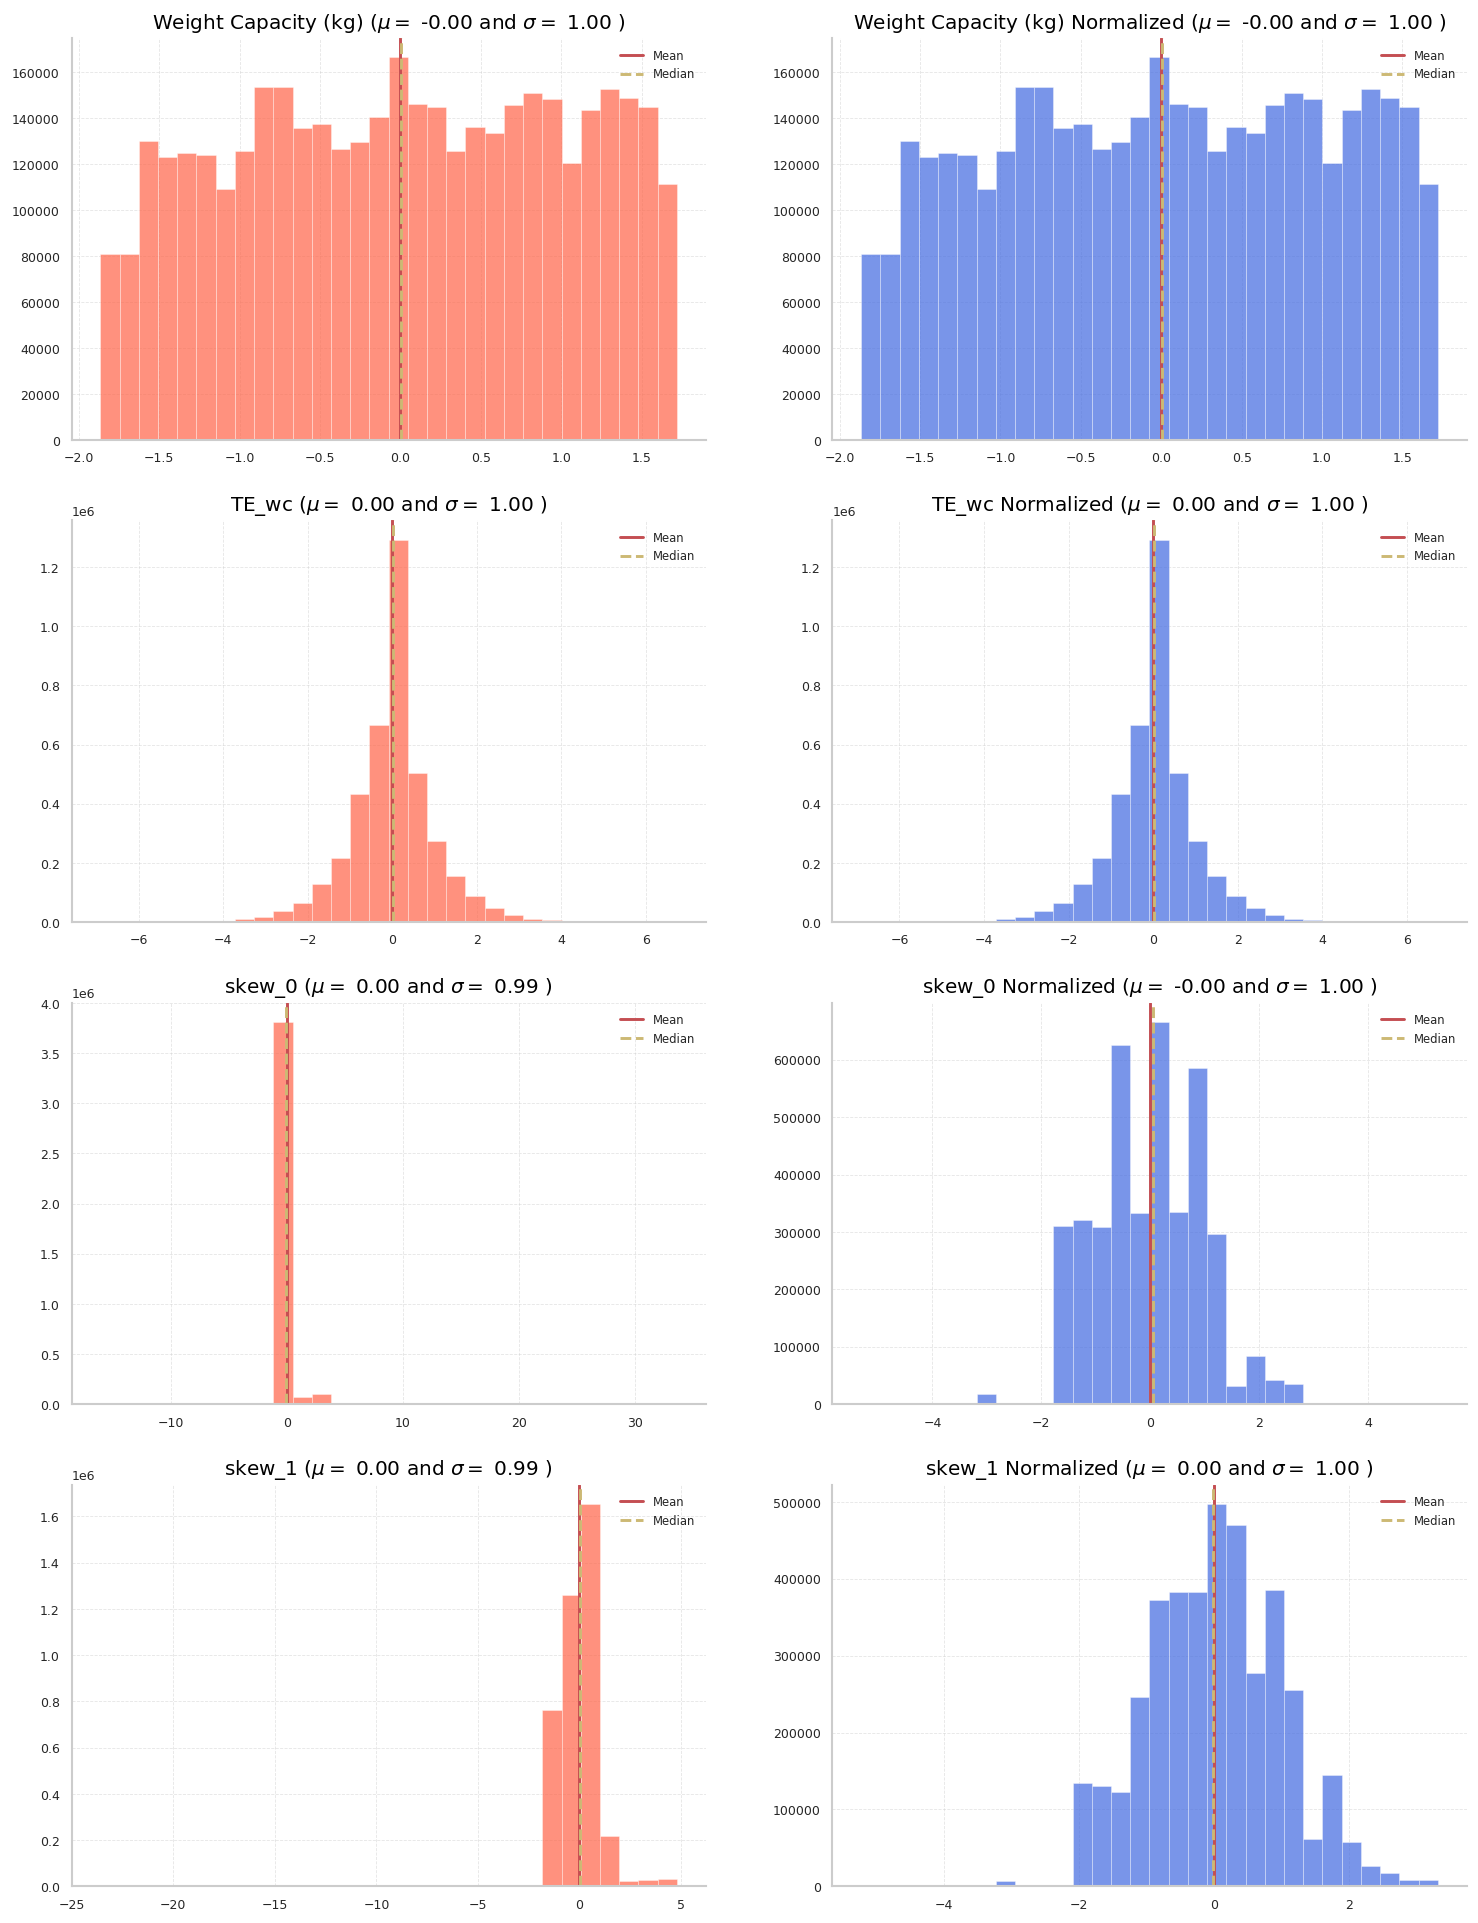

In [ ]:
t = Transform()
X, X_enc, y, test, test_enc, cat_features = t()

In [ ]:
t.cat_features, t.cat_features_card, t.train.shape, t.direction_

(['Brand',
  'Material',
  'Size',
  'Compartments',
  'Laptop Compartment',
  'Waterproof',
  'Style',
  'Color',
  'cheap_flag',
  'expansive_flag'],
 [6, 5, 4, 10, 3, 3, 4, 7, 2, 2],
 (3994318, 14),
 'minimize')

In [ ]:
#X.shape, X_enc.shape, test.shape, test_enc.shape

In [ ]:
#X_enc.isna().sum()

In [ ]:
imputer = MixedDataImputer(X_enc, test_enc)

In [ ]:
train_df_imputed, test_df_imputed = imputer.transform()

In [ ]:
train_df_imputed.isna().sum()

,0
Brand,0
Material,0
Size,0
Compartments,0
Laptop Compartment,0
Waterproof,0
Style,0
Color,0
Weight Capacity (kg),0
TE_wc,0


## 3.0 Advanced Feature Engeneering

In [ ]:
X_enc.sample(3)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),TE_wc,skew_0,skew_1,cheap_flag,expansive_flag
1290775,4,3,0,3,1,1,3,3,0.398548,1.560046,1.391704,0.291707,0,0
3597346,0,3,0,6,2,2,1,3,0.408570,-0.170742,-1.749252,1.131928,0,0
2985571,3,0,3,3,1,2,2,1,-0.052275,0.159772,0.746521,0.368845,0,0


In [ ]:
X_enc_y = pd.concat([X_enc, y], axis=1)
X_enc_y.sample(3)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),TE_wc,skew_0,skew_1,cheap_flag,expansive_flag,Price
2198061,5,0,3,5,1,1,3,2,-0.867668,-1.216453,1.019273,-1.055655,0,0,62.314899
263036,4,0,2,0,1,2,1,5,-0.710027,0.016408,2.029452,2.627789,0,0,29.110609
1432852,0,0,3,0,1,2,0,6,0.398646,-1.549553,0.746521,1.310607,0,0,55.473881


In [ ]:
X_enc_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 15 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 int64  
 1   Material              int64  
 2   Size                  int64  
 3   Compartments          int64  
 4   Laptop Compartment    int64  
 5   Waterproof            int64  
 6   Style                 int64  
 7   Color                 int64  
 8   Weight Capacity (kg)  float32
 9   TE_wc                 float32
 10  skew_0                float32
 11  skew_1                float32
 12  cheap_flag            int64  
 13  expansive_flag        int64  
 14  Price                 float32
dtypes: float32(5), int64(10)
memory usage: 411.4 MB


In [ ]:
class plot_class():

    def __init__(self,df, target_variable, features_cat,features_num):
      self.df = df
      self.target_variable = target_variable
      self.features_cat = features_cat
      self.features_num = features_num

    @classmethod
    def plot_categorical_features(cls, df, target_variable, features_cat, features_num):
        """
        Plots the frequency of the target variable for each value of multiple categorical features.

        Args:
          df: Pandas DataFrame containing the data.
          target_variable: Name of the target variable column in the DataFrame.
          features: List of names of the categorical feature columns to plot.
        """

        num_features = len(features_cat)
        num_rows = (num_features + 1) // 2  # Calculate the number of rows needed

        fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
        axes = axes.flatten()  # Flatten the axes array for easier iteration

        for i, feature in enumerate(features_cat):
            cross_tab = pd.crosstab(df[feature], df[target_variable])
            cross_tab.plot(kind='bar', stacked=False, position=0.3, width=0.4, ax=axes[i],colormap=palette_1, alpha=0.6)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
            axes[i].set_title(f'Frequency of {target_variable} by {feature}')

        # Hide any unused subplots
        for i in range(num_features, len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

        return cls(df, target_variable, features_cat, features_num)

    @classmethod
    def plot_numerical_features(cls, df, target_variable, features_cat, features_num):
        """
        Generates violin plots for numerical features, showing the distribution for each target class.

        Args:
          df: Pandas DataFrame containing the data.
          target_variable: Name of the target variable column in the DataFrame.
          features: List of names of the numerical feature columns to plot.
        """

        num_features = len(features_num)
        num_rows = (num_features + 1) // 2  # Calculate the number of rows needed

        fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
        axes = axes.flatten()  # Flatten the axes array for easier iteration

        for i, feature in enumerate(features_num):
            sns.violinplot(x=target_variable, y=feature, data=df, ax=axes[i],
                           hue=target_variable,  # Use 'hue' to color by target class
                           palette=palette_9)
            axes[i].set_xlabel(target_variable)
            axes[i].set_ylabel(feature)
            axes[i].set_title(f'Distribution of {feature} by {target_variable}')

        # Hide any unused subplots
        for i in range(num_features, len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

        return cls(df, target_variable, features_cat, features_num)

    def scatter_comp(self, feat_01, feat_02, hue_def):
        """
        Generates a scatter plot between two features, colored by a third
        categorical feature using Seaborn.

        Args:
          df: Pandas DataFrame containing the data.
          x_feature: Name of the feature to plot on the x-axis.
          y_feature: Name of the feature to plot on the y-axis.
          color_feature: Name of the categorical feature to use for coloring.
        """
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.scatterplot(
            x=feat_01,
            y=feat_02,
            hue=hue_def,  # Use 'hue' for color encoding
            data=self.df,
            ax=ax
        )

        plt.xlabel(feat_01)
        plt.ylabel(feat_02)
        plt.title(f'ScatterPlot of {feat_01} vs. {feat_02} colored by {hue_def}')
        plt.show()

    def heatmap_corr(self):
        print(Style.BRIGHT+Fore.RED+f'\nCorrelation Heatmap\n')
        plt.figure(figsize=(7,7))
        corr = self.df.select_dtypes(exclude='int').corr(method='pearson')
        sns.heatmap(corr, fmt = '0.2f', cmap = "Reds", annot=True, cbar=False)
        plt.show()

In [ ]:
#plot_instance = plot_class.plot_categorical_features(df=X_enc_y, target_variable="loan_status", features_cat=t.cat_features, features_num=t.num_features);

In [ ]:
#plot_instance.plot_numerical_features(df=X_enc_y, target_variable="loan_status", features_cat=t.cat_features, features_num=t.num_features);

In [ ]:
#plot_instance.scatter_comp(feat_01="loan_sustainability", feat_02="loan_grade", hue_def="loan_status")

In [ ]:
#plot_instance.heatmap_corr()

In [ ]:
X_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 int64  
 1   Material              int64  
 2   Size                  int64  
 3   Compartments          int64  
 4   Laptop Compartment    int64  
 5   Waterproof            int64  
 6   Style                 int64  
 7   Color                 int64  
 8   Weight Capacity (kg)  float32
 9   TE_wc                 float32
 10  skew_0                float32
 11  skew_1                float32
 12  cheap_flag            int64  
 13  expansive_flag        int64  
dtypes: float32(4), int64(10)
memory usage: 396.2 MB


In [ ]:
# X_enc_y.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/X_train_enc_expanded.csv", index=False)
# test_enc.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/X_test_enc_expanded.csv")

In [ ]:
X_enc_y = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/X_train_enc_expanded.csv")
test_enc = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S5E2/X_test_enc_expanded.csv", index_col=0)

## **4.0 MODELS**

--------------------

### **4.1 TREE BASED MODELS**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
# class_weights = dict(enumerate(class_weights))

# sample_pos_weight = class_weights[1]/class_weights[0]
# sample_pos_weight

#### 4.1.1 CatBoostClassifier:

    class CatBoostClassifier(iterations=None,
                            learning_rate=None,
                            depth=None,
                            l2_leaf_reg=None,
                            model_size_reg=None,
                            rsm=None,
                            loss_function=None,
                            border_count=None,
                            feature_border_type=None,
                            per_float_feature_quantization=None,
                            input_borders=None,
                            output_borders=None,
                            fold_permutation_block=None,
                            od_pval=None,
                            od_wait=None,
                            od_type=None,
                            nan_mode=None,
                            counter_calc_method=None,
                            leaf_estimation_iterations=None,
                            leaf_estimation_method=None,
                            thread_count=None,
                            random_seed=None,
                            use_best_model=None,
                            verbose=None,
                            logging_level=None,
                            metric_period=None,
                            ctr_leaf_count_limit=None,
                            store_all_simple_ctr=None,
                            max_ctr_complexity=None,
                            has_time=None,
                            allow_const_label=None,
                            classes_count=None,
                            class_weights=None,
                            auto_class_weights=None,
                            one_hot_max_size=None,
                            random_strength=None,
                            name=None,
                            ignored_features=None,
                            train_dir=None,
                            custom_loss=None,
                            custom_metric=None,
                            eval_metric=None,
                            bagging_temperature=None,
                            save_snapshot=None,
                            snapshot_file=None,
                            snapshot_interval=None,
                            fold_len_multiplier=None,
                            used_ram_limit=None,
                            gpu_ram_part=None,
                            allow_writing_files=None,
                            final_ctr_computation_mode=None,
                            approx_on_full_history=None,
                            boosting_type=None,
                            simple_ctr=None,
                            combinations_ctr=None,
                            per_feature_ctr=None,
                            task_type=None,
                            device_config=None,
                            devices=None,
                            bootstrap_type=None,
                            subsample=None,
                            sampling_unit=None,
                            dev_score_calc_obj_block_size=None,
                            max_depth=None,
                            n_estimators=None,
                            num_boost_round=None,
                            num_trees=None,
                            colsample_bylevel=None,
                            random_state=None,
                            reg_lambda=None,
                            objective=None,
                            eta=None,
                            max_bin=None,
                            scale_pos_weight=None,
                            gpu_cat_features_storage=None,
                            data_partition=None
                            metadata=None,
                            early_stopping_rounds=None,
                            cat_features=None,
                            grow_policy=None,
                            min_data_in_leaf=None,
                            min_child_samples=None,
                            max_leaves=None,
                            num_leaves=None,
                            score_function=None,
                            leaf_estimation_backtracking=None,
                            ctr_history_unit=None,
                            monotone_constraints=None,
                            feature_weights=None,
                            penalties_coefficient=None,
                            first_feature_use_penalties=None,
                            model_shrink_rate=None,
                            model_shrink_mode=None,
                            langevin=None,
                            diffusion_temperature=None,
                            posterior_sampling=None,
                            boost_from_average=None,
                            text_features=None,
                            tokenizers=None,
                            dictionaries=None,
                            feature_calcers=None,
                            text_processing=None,
                            fixed_binary_splits=None)


In [ ]:
cat_prob = {"objective":"RMSE","eval_metric":"RMSE"}

##### 4.1.2 Optuna Optimization:

In [ ]:
def objective_catboost(trial, X, y, n_splits, n_repeats, model=CatBoostRegressor, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold", metrics=cat_prob):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {
        'iterations': 1000,
        'learning_rate': 0.025, #trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 5, 9),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 0.1, log=True),
        "bootstrap_type": "Bayesian",
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.5, 1.5, step=0.1),
        'random_strength': trial.suggest_float('random_strength', 0.5, 3.5, step=0.25),
        #'border_count': trial.suggest_int('border_count', 32, 255),
        'cat_features': categorical_features,
        'task_type': 'GPU' if use_gpu else 'CPU',
        'random_seed':rs,
        'verbose': 250,
        'objective': metrics["objective"],
        'eval_metric': metrics["eval_metric"],
        "od_type":'EBS', #Early stopping hyperparmeter
        "od_wait":101,
        #"sampling_frequency":"PerTreeLevel",
        "use_best_model":True,
    }

    if cv_strategy == 'RepKFold':
      kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
      kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
      kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
      kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    rmse_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

        if fit_scaling:
          scaler = StandardScaler()
          X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
          X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        # Create the Pool objects for CatBoost
        train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
        valid_pool = Pool(data=X_valid, label=y_valid, cat_features=categorical_features)

        # Create the pipeline
        model = model_class(**params)
        # Fit the model:
        model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=101,
                  #callbacks=[optuna.integration.CatBoostPruningCallback(trial, "RMSE")]
                  )

        # Make predictions on the validation set
        y_pred = model.predict(X_valid)

#        y_pred = np.expm1(y_pred)
#        y_valid = np.expm1(y_valid)

        # Calculate the RMSE for the current fold

        rmse_score = root_mean_squared_error(y_valid, y_pred)
        rmse_scores.append(rmse_score)

    # Calculate the mean RMSLE score across all folds
    key_metric = np.mean(rmse_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
    study.optimize(lambda trial: objective_catboost(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")

In [ ]:
# usage with XGBRegressor
cat_study = tune_hyperparameters(X_enc, y, model_class=CatBoostRegressor, n_trials=31, n_splits_ = 5 ,n_repeats_=3, use_gpu=True)
save_results(cat_study, CatBoostRegressor, "CatBoost_ext")
cat_params = cat_study.best_paramsy

- Trial 10 finished with value: 38.67948459216966
- Parameters: {'depth': 9, 'l2_leaf_reg': 0.004177701145518355, 'bagging_temperature': 0.5, 'random_strength': 0.5}

In [ ]:
X_enc.head()

#### **4.2.1 LGBMRegressor**

In [ ]:
import lightgbm as lgb
lgbm_prob = {"objective":"regression","eval_metric":"rmse"}

##### 4.2.2 Optuna Optimization:

In [ ]:
X_enc.info()
t.cat_features

In [ ]:
def objective_lgbm(trial, X, y, n_splits, n_repeats, model=LGBMRegressor, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold", metrics=lgbm_prob):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {
        'num_leaves': trial.suggest_int('num_leaves', 31, 131),
        'learning_rate': 0.02, #trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        #'max_depth': trial.suggest_int('max_depth', 5, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 60),
        'subsample': trial.suggest_float('subsample', 0.5, 0.95),
        'subsample_freq': trial.suggest_int('subsample_freq', 1, 3),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        "reg_alpha" :         trial.suggest_float("reg_alpha", 1e-3, 1.0, log=True),
        "reg_lambda" :        trial.suggest_float("reg_lambda", 1e-3, 1.0, log=True),
        "boosting_type":      'gbdt',
        'n_estimators': 2501,
        'objective': metrics["objective"],
        'device': 'gpu' if use_gpu else 'cpu',
        'verbose': -1,
        #'scale_pos_weight': sample_pos_weight,
#       'categorical_feature': [2,4,5,9],
        'random_state': rs,
    }

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    rmse_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1, 1)

        if fit_scaling:
            scaler = StandardScaler()
            X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
            X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        # Create the datasets for LightGBM
        # d_train = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
        # d_valid = lgb.Dataset(X_valid, label=y_valid, categorical_feature=categorical_features)

        # Create the model
        model = model_class(**params)

        # Create the early stopping callback
        early_stop = early_stopping(stopping_rounds=101)

        # Fit the model
        model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], callbacks=[early_stop], eval_metric=metrics["eval_metric"], categorical_feature= categorical_features)

        # Make predictions on the validation set
        y_pred = model.predict(X_valid)

        # Calculate the RMSE for the current fold

        rmse_score = root_mean_squared_error(y_valid, y_pred)
        rmse_scores.append(rmse_score)

    # Calculate the mean RMSLE score across all folds
    key_metric = np.mean(rmse_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
    study.optimize(lambda trial: objective_lgbm(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
cat_study = tune_hyperparameters(X_enc, y, model_class=LGBMRegressor, n_trials=31, n_splits_ = 5 ,n_repeats_=3, use_gpu=True)
save_results(cat_study, LGBMRegressor, "LGBMBoost_ext")
cat_params = cat_study.best_params

- Trial 28 finished with value: 38.657451168104984
- parameters: {'num_leaves': 103, 'min_child_samples': 36, 'subsample': 0.9131771240297577, 'subsample_freq': 2, 'colsample_bytree': 0.6190291906152294, 'reg_alpha': 0.03976551748855951, 'reg_lambda': 0.2576052197300848}

#### **4.3.1 XGBClassifier**

In [ ]:
import xgboost as xgb
xgb_prob = {'objective': "reg:squarederror",'eval_metric': "rmse"}

In [ ]:
X_enc[t.cat_features] = X_enc[t.cat_features].astype("category")
test_enc[t.cat_features] = test_enc[t.cat_features].astype("category")
test_enc.info()

##### 4.2.2 Optuna Optimization:

In [ ]:
def objective_xgb(trial, X, y, n_splits, n_repeats, model=XGBRegressor, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold", metrics=xgb_prob):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {
              'n_estimators': 1000,
              'learning_rate': 0.025, #trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
              'max_depth': trial.suggest_int('max_depth', 3, 10),
              #'max_bin': trial.suggest_int('max_bin', 255, 511),
              'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
              'subsample': trial.suggest_float('subsample', 0.7, 0.95),
              'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 0.95),
              'gamma': trial.suggest_float('gamma', 0, 1),
              'reg_alpha': trial.suggest_float('reg_alpha', 0.00001, 1.0, log=True),
              'reg_lambda': trial.suggest_float('reg_lambda', 0.00001, 10, log=True),
              'objective':  metrics["objective"],  # For binary classification
              'eval_metric': metrics["eval_metric"],
              "early_stopping_rounds":51,
              'tree_method': 'gpu_hist' if use_gpu else 'hist',  # Use GPU if available
              'random_state': rs,
              'enable_categorical': True,
#              'scale_pos_weight': sample_pos_weight,
             }

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    rmse_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1, 1)

        if fit_scaling:
            scaler = StandardScaler()
            X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
            X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        # Create DMatrix objects for XGBoost
        d_train = xgb.DMatrix(X_train, label=y_train,feature_types=["c","c","c","c",
                                                                    "c","c","c","c",
                                                                    "q","q","q","q",
                                                                    "c","c"],enable_categorical=True)
        d_valid = xgb.DMatrix(X_valid, label=y_valid,feature_types=["c","c","c","c",
                                                                    "c","c","c","c",
                                                                    "q","q","q","q",
                                                                    "c","c"],enable_categorical=True)

        # Create the model
        model = model_class(**params)

        # Create the early stopping callback
        # early_stop = early_stopping(stopping_rounds=101)

        # Fit the model
        model.fit(X_train, y_train,
                  eval_set=[(X_valid, y_valid)],
                  verbose=False)

        # Make predictions on the validation set
        y_pred = model.predict(X_valid)

        # Calculate the RMSE for the current fold
        rmse_score = root_mean_squared_error(y_valid, y_pred)
        rmse_scores.append(rmse_score)

    # Calculate the mean RMSLE score across all folds
    key_metric = np.mean(rmse_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
    study.optimize(lambda trial: objective_xgb(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
cat_study = tune_hyperparameters(X_enc, y, model_class=XGBRegressor, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=True)
save_results(cat_study, XGBRegressor, "XGB_ext")
cat_params = cat_study.best_params

- Trial 18 finished with value: 38.66071701049805
- parameters: {'max_depth': 9, 'min_child_weight': 9, 'subsample': 0.9493097301768285, 'colsample_bytree': 0.750026675584575, 'gamma': 0.5511841320880777, 'reg_alpha': 0.006948944983035811, 'reg_lambda': 0.0015661314558322087}.

#### **4.4.1 TabNetClassifier**

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
tab_prob = {'eval_metric': "rmse"}

In [ ]:
X_enc.sample(3)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),TE_wc,skew_0,skew_1,cheap_flag,expansive_flag
3782983,5,3,1,7,1,1,3,2,1.451171,0.016408,0.483511,-0.935853,0,0
2003343,3,0,1,1,2,2,3,0,-0.433108,0.033023,-1.185578,-0.348455,0,0
3404963,4,3,3,7,2,2,3,6,1.522432,-1.099254,-0.846883,0.448205,0,0


In [ ]:
grouped_features = []
feature_cols = X_enc.columns.to_list()

group_1 = ["Brand",	"Material",	"Size",	"Compartments",	"Laptop Compartment",	"Waterproof",	"Style",	"Color"]
group_2 = ['cheap_flag',	'expansive_flag']
#group_3 = ['cb_person_default_on_file']

# Iterate through each set of related columns (e.g., blood glucose, insulin, etc.)
for colset in [group_1,group_2]:
    group_idxs = [idx for idx, col in enumerate(feature_cols) if col in colset]
    grouped_features.append(group_idxs)

In [ ]:
grouped_features

[[0, 1, 2, 3, 4, 5, 6, 7], [12, 13]]

##### 4.2.2 Optuna Optimization:

In [ ]:
cate_feat = t.cat_features.copy()

for colset in [cate_feat]:
    cat_index_cols = [idx for idx, col in enumerate(feature_cols) if col in colset]

cat_index_cols[-2:]

[12, 13]

In [ ]:
[len(X_enc[col].unique()) for col in t.cat_features][-2:]

[2, 2]

In [ ]:
def objective_tabnet(trial, X, y, n_splits, n_repeats, model=TabNetRegressor, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold", metrics=tab_prob):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {'n_d': trial.suggest_categorical('n_d', [4,8,12]),
              'n_a': trial.suggest_categorical('n_d', [4,8,12]),
              'n_steps': trial.suggest_int('n_steps', 3, 4),
              'gamma': trial.suggest_float('gamma', 1.01, 2),
              'lambda_sparse':trial.suggest_float('lambda_sparse', 1e-5, 1e-1),
              "grouped_features":grouped_features,
              #'cat_idxs': cat_index_cols,
              #'cat_dims': [len(X_enc[col].unique()) for col in categorical_features],
              #'cat_emb_dim': [2,2,1,3,1,1,1,2,1,1],
              'n_independent': trial.suggest_int('n_independent', 1, 3),
              'n_shared': trial.suggest_int('n_shared', 1, 3),
              'mask_type': trial.suggest_categorical('mask_type', ['sparsemax']),
              'device_name': 'cuda' if use_gpu else 'cpu',
              'seed': rs,
              "optimizer_fn":torch.optim.Adam,
              "optimizer_params":dict(lr=0.01),
              "scheduler_params":{"patience":3, # how to use learning rate scheduler
                                "factor":0.5,
                                "min_lr":0.0001},
              "scheduler_fn":torch.optim.lr_scheduler.ReduceLROnPlateau,
              }

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    rmse_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1, 1)

        if fit_scaling:
            scaler = StandardScaler()
            X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
            X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        # Create the model
        model = model_class(**params)

        # Fit the model
        model.fit(X_train.values, y_train,
                  eval_set=[(X_valid.values, y_valid)],
                  batch_size=1024,
                  max_epochs=11,
                  patience=5,
                  eval_metric=[tab_prob["eval_metric"]])

        # Make predictions on the validation set
        y_pred = model.predict(X_valid.values)

        # Calculate the RMSE for the current fold
        rmse_score = root_mean_squared_error(y_valid, y_pred)
        rmse_scores.append(rmse_score)

    # Calculate the mean RMSLE score across all folds
    key_metric = np.mean(rmse_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
    study.optimize(lambda trial: objective_tabnet(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
tab_study = tune_hyperparameters(X_enc, y, model_class=TabNetRegressor, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=True)
save_results(tab_study, TabNetRegressor, "tabnet_ext")
tab_params = tab_study.best_params

#### 4.5.1 Yggdrasil - RandomForest

In [ ]:
#!pip install ydf -U

In [ ]:
y.head()

##### 4.5.2 Optuna Optimization:

[HyperParameters Link](https://ydf.readthedocs.io/en/stable/hyperparameters/#lambda_loss)

In [ ]:
# import ydf

# def objective_ydf_gbt(trial, X, y, n_splits, n_repeats, model_ = ydf.GradientBoostedTreesLearner, rs=42, fit_scaling=False, cv_strategy="KFold", use_gpu=False):

#     model_class = model_  # Use ydf's GradientBoostedTreesLearner

#     categorical_features = t.cat_features.copy()  # Assuming 't' is defined somewhere with categorical features

#     num_cols = [col for col in X.columns if col not in categorical_features]
#     auc_scores = []

#     params = {
#         'loss':"BINOMIAL_LOG_LIKELIHOOD",
#         'num_trees': trial.suggest_int('num_trees', 100, 1000),  # Number of trees in the forest
#         'max_depth': trial.suggest_int('max_depth', 3, 10),  # Maximum depth of the trees
#         'min_examples': trial.suggest_int('min_examples', 1, 10),  # Minimum number of samples required to split an internal node
#         'l1_regularization': trial.suggest_float('l1_regularization', 1e-5, 10.0, log=True),
#         'l2_regularization': trial.suggest_float('l2_regularization', 1e-5, 10.0, log=True),
# #         'shrinkage': trial.suggest_float('shrinkage', 0.01, 0.3, log=True),  # Similar to learning rate, but applied after each tree is trained
#          'subsample': trial.suggest_float('subsample', 0.7, 1.0),  # Fraction of samples used for training each tree
# # #        'max_categorical_cardinality': trial.suggest_int('max_categorical_cardinality', 10, 100),  # Maximum number of unique values for categorical features
# #         'categorical_algorithm': trial.suggest_categorical('categorical_algorithm', ['CART', 'RANDOM']),  # Algorithm used for categorical splits
# #         'split_axis': trial.suggest_categorical('split_axis', ['AXIS_ALIGNED', 'SPARSE_OBLIQUE']),  # How to split numerical features
# #         'sparse_oblique_normalization': trial.suggest_categorical('sparse_oblique_normalization', ['NONE', 'STANDARD_DEVIATION', 'MIN_MAX']),  # Normalization for sparse oblique splits
# #         'sparse_oblique_num_projections_exponent': trial.suggest_float('sparse_oblique_num_projections_exponent', 0.5, 1.0),  # Exponent for the number of projections in sparse oblique splits
#         'random_seed': rs,  # Random seed for reproducibility
#         'early_stopping':"LOSS_INCREASE",  # Enable early stopping
#         'early_stopping_num_trees_look_ahead': 30,  # Number of trees to look ahead for early stopping
# #        'weights': {0:1,1:sample_pos_weight},
#         "label" : "loan_status",
#         }


#     if cv_strategy == 'RepKFold':
#         kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
#     elif cv_strategy == 'KFold':
#         kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
#     elif cv_strategy == "StratKFold":
#         kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
#     elif cv_strategy == "RepStratKFold":
#         kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

#     for idx_train, idx_valid in kf.split(X, y):

#         # Split the data
#         X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
#         X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]

#         if fit_scaling:
#             scaler = StandardScaler()
#             X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
#             X_valid[num_cols] = scaler.transform(X_valid[num_cols])

#         X_train["loan_status"] = y_train.values
#         X_valid["loan_status"] = y_valid.values

#         # Train the model with early stopping
#         model = model_class(task=ydf.Task.CLASSIFICATION, **params)
#         model.train(X_train, valid=(X_valid))  # Use ydf's fit method with early stopping

#         # Make predictions
#         y_pred = model.get_predictions(X_valid)["loan_status_probability_1"]

#         # Calculate AUC
#         auc_score = roc_auc_score(y_valid, y_pred)
#         auc_scores.append(auc_score)

#     # Calculate the mean AUC
#     key_metric = np.mean(auc_scores)

#     return key_metric

In [ ]:
# # Step 2: Tuning Hyperparameters with Optuna
# def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
#     study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
#     study.optimize(lambda trial: objective_ydf_gbt(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model_=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
#     return study  # Return the study object

# # Step 3: Saving Best Results and Models
# def save_results(study, model_class, model_name):
#     best_params_file = f"{model_name}_best_params.joblib"
#     joblib.dump(study.best_params, best_params_file)
#     print(f"Best parameters for {model_name} saved to {best_params_file}")

#     verbose_file = f"{model_name}_ydf_verbose.log"
#     with open(verbose_file, "w") as f:
#         f.write(str(study.trials))
#     print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
# cat_study = tune_hyperparameters(X_enc, y, model_class=ydf.GradientBoostedTreesLearner, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=False)
# save_results(cat_study, TabNetClassifier, "ydf_ext")
# cat_params = cat_study.best_params

#### **4.6.1 NeuralNetwork**

In [ ]:
X_enc.sample(3)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),TE_wc,skew_0,skew_1,cheap_flag,expansive_flag
3627270,1,0,3,6,1,2,0,5,1.087092,-0.217410,0.746521,0.063366,0,0
156426,3,4,0,6,1,2,3,0,-1.030614,-0.202770,0.044250,0.216236,0,0
963428,4,3,1,2,2,2,0,3,1.682245,-0.364852,-1.185578,-0.018634,0,0


In [ ]:
def build_model(units=512,last_layer = 1, activation="relu"):

    x_input_cats = layers.Input(shape=(len(t.cat_features),))
    embs = []
    for j in range(len(cat_features)):
        e = layers.Embedding(t.cat_features_card[j], int(np.ceil(np.sqrt(t.cat_features_card[j]))))
        x = e(x_input_cats[:,j])
        x = layers.Flatten()(x)
        embs.append(x)

    x_input_nums = layers.Input(shape=(len(t.num_features),))

    x = layers.Concatenate(axis=-1)(embs+[x_input_nums])
    x = layers.Dense(units, activation=activation)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(units, activation=activation)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(int(units/last_layer), activation=activation)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=[x_input_cats,x_input_nums], outputs=x)
    return model

In [ ]:
t.cat_features_card,np.ceil(np.sqrt(t.cat_features_card)),len(t.cat_features)

([6, 5, 4, 10, 3, 3, 4, 7, 2, 2],
 array([3., 3., 2., 4., 2., 2., 2., 3., 2., 2.]),
 10)

##### 4.2.2 Optuna Optimization:

In [ ]:
categorical_feat = t.cat_features.copy()
numerical_feat = t.num_features.copy()

X_train_cat = X_enc[categorical_feat]
X_train_num = X_enc[numerical_feat]

X_test_cat = test_enc[categorical_feat]
X_test_num = test_enc[numerical_feat]

X_train_cat.info()
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column              Dtype
---  ------              -----
 0   Brand               int64
 1   Material            int64
 2   Size                int64
 3   Compartments        int64
 4   Laptop Compartment  int64
 5   Waterproof          int64
 6   Style               int64
 7   Color               int64
 8   cheap_flag          int64
 9   expansive_flag      int64
dtypes: int64(10)
memory usage: 335.2 MB
<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 4 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Weight Capacity (kg)  float32
 1   TE_wc                 float32
 2   skew_0                float32
 3   skew_1                float32
dtypes: float32(4)
memory usage: 91.4 MB


In [ ]:
def objective_nn(trial, X, y, n_splits, n_repeats, model=build_model, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold"):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {'units': trial.suggest_categorical('units', [128,256,512,1024]),
              'last_layer': trial.suggest_int('last_layer', 1,2),
              'activation': trial.suggest_categorical('activation', ["relu","selu","gelu","silu"])}

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    rmse_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy()#.reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy()#.reshape(-1, 1)

        categorical_feat = t.cat_features.copy()
        numerical_feat = t.num_features.copy()

        X_train_cat = X_train[categorical_feat]
        X_train_num = X_train[numerical_feat]

        X_valid_cat = X_valid[categorical_feat]
        X_valid_num = X_valid[numerical_feat]

        # Create the model
        keras.utils.set_random_seed(rs)
        model = model_class(**params)

        optimizer = keras.optimizers.Adam(learning_rate=1e-3)
        model.compile(optimizer=optimizer, loss=keras.losses.MeanSquaredError(name="mean_squared_error"),
                      metrics=[keras.metrics.RootMeanSquaredError(name="RMSE")])

        # Fit the model
        model.fit([X_train_cat,X_train_num], y_train,
                  validation_data=([X_valid_cat, X_valid_num], y_valid),
                  epochs=25,
                  batch_size=1024,
                  callbacks=[keras.callbacks.ReduceLROnPlateau(patience=5),
                              keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_rmse",
                                                            start_from_epoch=3, mode="min")])

        # Make predictions on the validation set
        y_pred = model.predict([X_valid_cat, X_valid_num])

        # Calculate the RMSE for the current fold
        rmse_score = root_mean_squared_error(y_valid, y_pred)
        rmse_scores.append(rmse_score)

    # Calculate the mean RMSLE score across all folds
    key_metric = np.mean(rmse_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
    study.optimize(lambda trial: objective_nn(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=build_model, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
cat_study = tune_hyperparameters(X_enc, y, model_class=build_model, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=True)
#save_results(cat_study, TabNetClassifier, "tabnet_ext")
cat_params = cat_study.best_params

[I 2025-02-22 10:43:19,819] A new study created in memory with name: no-name-da565752-2ae0-42aa-ab90-3d713d7cd484


Epoch 1/25


[W 2025-02-22 10:43:26,476] Trial 0 failed with parameters: {'units': 512, 'last_layer': 2, 'activation': 'silu'} because of the following error: FailedPreconditionError().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-42-f63d57ecfd44>", line 4, in <lambda>
    study.optimize(lambda trial: objective_nn(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=build_model, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-41-f555a01cb6c3>", line 48, in objective_nn
    model.fit([X_train_cat,X_train_num], y_train,
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handl

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-44-3ce299ed4080>", line 1, in <cell line: 0>

  File "<ipython-input-42-f63d57ecfd44>", line 4, in tune_hyperparameters

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/study.py", line 475, in optimize

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 63, in _optimize

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 160, in _optimize_sequential

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial

  File "<ipython-input-42-f63d57ecfd44>", line 4, in <lambda>

  File "<ipython-input-41-f555a01cb6c3>", line 48, in objective_nn

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_10724]

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

* Trial 3 finished with value: 38.69801712036133
* parameters: {'units': 1024, 'last_layer': 2, 'activation': 'silu'}

#### **4.6.1 NeuralNetwork v1**

In [ ]:
X_enc.sample(3)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),TE_wc,skew_0,skew_1,cheap_flag,expansive_flag
1308799,2,1,0,5,1,1,1,5,0.564222,-0.120751,1.391704,1.500713,0,0
769973,2,3,0,4,1,1,1,6,-0.641991,-0.703372,1.391704,1.500713,0,0
369845,1,1,3,1,1,1,3,4,-0.091990,-0.348663,1.019273,0.063366,0,0


In [ ]:
def build_model(units=512,last_layer = 1, activation="relu", reg=0.001, dropout_rate=0.33):

    x_input_cats = layers.Input(shape=(len(t.cat_features),))
    embs = []
    for j in range(len(cat_features)):
        e = layers.Embedding(t.cat_features_card[j], int(np.ceil(np.sqrt(t.cat_features_card[j]))))
        x = e(x_input_cats[:,j])
        x = layers.Flatten()(x)
        embs.append(x)

    x_input_nums = layers.Input(shape=(len(t.num_features),))

    x = layers.Concatenate(axis=-1)(embs+[x_input_nums])

    # Reshape for the Attention layer.  Crucial for keras.layers.Attention
    # The Attention layer expects 3D tensors. Even if your "sequence"
    # length is 1, you MUST add a dimension.

    reshaped_features = layers.Reshape((1, -1))(x)

    attention_output = layers.Attention()([reshaped_features, reshaped_features])  # Self-attention

    # Flatten the attention output:
    flattened_attention = layers.Flatten()(attention_output)

    # Concatenate with original features (optional but often helpful):
    x = layers.Concatenate(axis=-1)([x, flattened_attention])

    x = layers.Dense(units, activation=activation, kernel_regularizer=keras.regularizers.l2(reg))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Dense(units, activation=activation, kernel_regularizer=keras.regularizers.l2(reg))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Dense(units, activation=activation, kernel_regularizer=keras.regularizers.l2(reg))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=[x_input_cats,x_input_nums], outputs=x)
    return model

In [ ]:
mod_test = build_model()
mod_test.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_20 (GetItem)     │ (None)                 │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_21 (GetItem)     │ (None)                 │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_22 (GetItem)     │ (None)                 │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_23 (GetItem)     │ (None)                 │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_24 (GetItem)     │ (None)                 │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_25 (GetItem)     │ (None)                 │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_26 (GetItem)     │ (None)                 │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_27 (GetItem)     │ (None)                 │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_28 (GetItem)     │ (None)                 │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_29 (GetItem)     │ (None)                 │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_20 (Embedding)  │ (None, 3)              │             18 │ get_item_20[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_21 (Embedding)  │ (None, 3)              │             15 │ get_item_21[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_22 (Embedding)  │ (None, 2)              │              8 │ get_item_22[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_23 (Embedding)  │ (None, 4)              │             40 │ get_item_23[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_24 (Embedding)  │ (None, 2)              │              6 │ get_item_24[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_25 (Embedding)  │ (None, 2)              │              6 │ get_item_25[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_26 (Embedding)  │ (None, 2)              │              8 │ get_item_26[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_27 (Embedding)  │ (None, 3)              │             21 │ get_item_27[0][0]      │
├──────────────────────

 Total params: 562,307 (2.15 MB)

 Trainable params: 559,235 (2.13 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [ ]:
t.cat_features_card,np.ceil(np.sqrt(t.cat_features_card)),len(t.cat_features)

([6, 5, 4, 10, 3, 3, 4, 7, 2, 2],
 array([3., 3., 2., 4., 2., 2., 2., 3., 2., 2.]),
 10)

##### 4.2.2 Optuna Optimization:

In [ ]:
categorical_feat = t.cat_features.copy()
numerical_feat = t.num_features.copy()

X_train_cat = X_enc[categorical_feat]
X_train_num = X_enc[numerical_feat]

X_test_cat = test_enc[categorical_feat]
X_test_num = test_enc[numerical_feat]

X_train_cat.info()
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column              Dtype
---  ------              -----
 0   Brand               int64
 1   Material            int64
 2   Size                int64
 3   Compartments        int64
 4   Laptop Compartment  int64
 5   Waterproof          int64
 6   Style               int64
 7   Color               int64
 8   cheap_flag          int64
 9   expansive_flag      int64
dtypes: int64(10)
memory usage: 335.2 MB
<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 4 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Weight Capacity (kg)  float32
 1   TE_wc                 float32
 2   skew_0                float32
 3   skew_1                float32
dtypes: float32(4)
memory usage: 91.4 MB


In [ ]:
def objective_nn(trial, X, y, n_splits, n_repeats, model=build_model, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold"):

    model_class = model

    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {'units': trial.suggest_categorical('units', [128,256,512,1024]),
              'last_layer': trial.suggest_int('last_layer', 1,2),
              'activation': trial.suggest_categorical('activation', ["relu","selu","gelu","silu"]), #, reg=0.001, dropout_rate=0.33)
              'reg': trial.suggest_float('reg', 1e-4, 0.1, log=True),
              'dropout_rate': trial.suggest_float('dropout_rate', 0.30, 0.50)
              }

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    rmse_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy()#.reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy()#.reshape(-1, 1)

        categorical_feat = t.cat_features.copy()
        numerical_feat = t.num_features.copy()

        X_train_cat = X_train[categorical_feat]
        X_train_num = X_train[numerical_feat]

        X_valid_cat = X_valid[categorical_feat]
        X_valid_num = X_valid[numerical_feat]

        # Create the model
        keras.utils.set_random_seed(rs)
        model = model_class(**params)

        optimizer = keras.optimizers.Adam(learning_rate=1e-3)
        model.compile(optimizer=optimizer, loss=keras.losses.MeanSquaredError(name="mean_squared_error"),
                      metrics=[keras.metrics.RootMeanSquaredError(name="RMSE")])

        # Fit the model
        model.fit([X_train_cat,X_train_num], y_train,
                  validation_data=([X_valid_cat, X_valid_num], y_valid),
                  epochs=25,
                  batch_size=1024,
                  callbacks=[keras.callbacks.ReduceLROnPlateau(patience=5),
                              keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_rmse",
                                                            start_from_epoch=3, mode="min")])

        # Make predictions on the validation set
        y_pred = model.predict([X_valid_cat, X_valid_num])

        # Calculate the RMSE for the current fold
        rmse_score = root_mean_squared_error(y_valid, y_pred)
        rmse_scores.append(rmse_score)

    # Calculate the mean RMSLE score across all folds
    key_metric = np.mean(rmse_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
    study.optimize(lambda trial: objective_nn(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=build_model, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
cat_study = tune_hyperparameters(X_enc, y, model_class=build_model, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=True)
#save_results(cat_study, TabNetClassifier, "tabnet_ext")
cat_params = cat_study.best_params

[I 2025-02-15 16:03:45,993] A new study created in memory with name: no-name-36849c32-d360-4d35-8d2a-109bfaa1d4aa


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - RMSE: 51.3745 - loss: 2832.1123 - val_RMSE: 38.7568 - val_loss: 1519.5251 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.9979 - loss: 1536.6611 - val_RMSE: 38.7666 - val_loss: 1515.6813 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8919 - loss: 1525.1195 - val_RMSE: 38.7090 - val_loss: 1509.4550 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8501 - loss: 1519.8094 - val_RMSE: 38.6949 - val_loss: 1506.4019 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8228 - loss: 1516.0771 - val_RMSE: 38.6996 - val_loss: 1505.6942 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8137 - loss: 1514.2294 - val_RMSE: 38.7109 - val_loss: 1505.5392 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.802

[I 2025-02-15 16:40:07,636] Trial 0 finished with value: 38.70439020792643 and parameters: {'units': 1024, 'last_layer': 1, 'activation': 'relu', 'reg': 0.03532288502832786, 'dropout_rate': 0.31396524201979953}. Best is trial 0 with value: 38.70439020792643.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - RMSE: 54.1264 - loss: 3079.4102 - val_RMSE: 38.7246 - val_loss: 1500.0896 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 39.0518 - loss: 1525.5660 - val_RMSE: 38.7018 - val_loss: 1498.4287 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.9228 - loss: 1515.6116 - val_RMSE: 38.6893 - val_loss: 1497.5673 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8847 - loss: 1512.7523 - val_RMSE: 38.6864 - val_loss: 1497.4307 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8597 - loss: 1510.8882 - val_RMSE: 38.6857 - val_loss: 1497.4148 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8535 - loss: 1510.4323 - val_RMSE: 38.6840 - val_loss: 1497.2799 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.846

[I 2025-02-15 17:10:07,902] Trial 1 finished with value: 38.696816762288414 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'relu', 'reg': 0.00027561698595006656, 'dropout_rate': 0.4105017873627729}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - RMSE: 51.4811 - loss: 2785.5352 - val_RMSE: 38.7200 - val_loss: 1501.3983 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 39.0050 - loss: 1523.6791 - val_RMSE: 38.7155 - val_loss: 1501.4891 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - RMSE: 38.8815 - loss: 1514.4375 - val_RMSE: 38.7056 - val_loss: 1500.8835 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8411 - loss: 1511.3909 - val_RMSE: 38.7018 - val_loss: 1500.5566 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8134 - loss: 1509.1803 - val_RMSE: 38.6988 - val_loss: 1500.1974 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8055 - loss: 1508.4283 - val_RMSE: 38.6927 - val_loss: 1499.5613 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.799

[I 2025-02-15 17:46:47,489] Trial 2 finished with value: 38.697156270345054 and parameters: {'units': 1024, 'last_layer': 1, 'activation': 'relu', 'reg': 0.0005402789192665301, 'dropout_rate': 0.36286329232617837}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - RMSE: 61.1220 - loss: 3901.1499 - val_RMSE: 38.7016 - val_loss: 1498.0620 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.4299 - loss: 1554.9777 - val_RMSE: 38.6945 - val_loss: 1497.5388 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 39.3545 - loss: 1549.0581 - val_RMSE: 38.6946 - val_loss: 1497.5609 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.3389 - loss: 1547.8391 - val_RMSE: 38.6933 - val_loss: 1497.4711 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.3170 - loss: 1546.1323 - val_RMSE: 38.6943 - val_loss: 1497.5634 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.3075 - loss: 1545.3971 - val_RMSE: 38.6924 - val_loss: 1497.4204 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.2967

[I 2025-02-15 18:10:55,657] Trial 3 finished with value: 38.70516586303711 and parameters: {'units': 128, 'last_layer': 2, 'activation': 'selu', 'reg': 0.0006168819899394228, 'dropout_rate': 0.48350841958817187}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - RMSE: 60.7275 - loss: 3860.7412 - val_RMSE: 38.7025 - val_loss: 1503.1106 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.1660 - loss: 1538.8193 - val_RMSE: 38.6939 - val_loss: 1500.7462 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.0876 - loss: 1530.9313 - val_RMSE: 38.6927 - val_loss: 1499.0325 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.0727 - loss: 1528.3319 - val_RMSE: 38.6935 - val_loss: 1498.2562 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.0608 - loss: 1526.7576 - val_RMSE: 38.6941 - val_loss: 1498.1229 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.0604 - loss: 1526.5984 - val_RMSE: 38.6947 - val_loss: 1498.0813 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.0617

[I 2025-02-15 18:35:07,326] Trial 4 finished with value: 38.70415115356445 and parameters: {'units': 128, 'last_layer': 1, 'activation': 'selu', 'reg': 0.019199229166119592, 'dropout_rate': 0.3341626635520698}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - RMSE: 57.1019 - loss: 3422.7141 - val_RMSE: 38.7026 - val_loss: 1498.1483 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 39.0765 - loss: 1527.2397 - val_RMSE: 38.6906 - val_loss: 1497.2533 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 38.9670 - loss: 1518.7303 - val_RMSE: 38.6889 - val_loss: 1497.1610 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 38.9329 - loss: 1516.1066 - val_RMSE: 38.6860 - val_loss: 1496.9572 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 38.9313 - loss: 1516.0071 - val_RMSE: 38.6864 - val_loss: 1497.0135 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - RMSE: 38.9215 - loss: 1515.2563 - val_RMSE: 38.6849 - val_loss: 1496.9028 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - RMSE: 38.9178

[I 2025-02-15 19:01:01,290] Trial 5 finished with value: 38.698568979899086 and parameters: {'units': 256, 'last_layer': 1, 'activation': 'gelu', 'reg': 0.0003050914095911242, 'dropout_rate': 0.3691098556240708}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - RMSE: 53.8575 - loss: 3059.3425 - val_RMSE: 38.7152 - val_loss: 1507.5746 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.9927 - loss: 1528.3422 - val_RMSE: 38.7115 - val_loss: 1504.0999 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8892 - loss: 1517.3347 - val_RMSE: 38.6953 - val_loss: 1500.9766 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8553 - loss: 1513.1832 - val_RMSE: 38.6935 - val_loss: 1500.1469 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8347 - loss: 1510.9808 - val_RMSE: 38.6920 - val_loss: 1499.5760 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8232 - loss: 1509.6844 - val_RMSE: 38.6922 - val_loss: 1499.2373 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8176

[I 2025-02-15 19:31:47,179] Trial 6 finished with value: 38.700243631998696 and parameters: {'units': 512, 'last_layer': 2, 'activation': 'silu', 'reg': 0.007472176524756258, 'dropout_rate': 0.30743712269143775}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - RMSE: 51.5286 - loss: 2852.2712 - val_RMSE: 38.7185 - val_loss: 1518.3163 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - RMSE: 39.0282 - loss: 1540.8573 - val_RMSE: 38.7080 - val_loss: 1513.8391 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - RMSE: 38.9052 - loss: 1528.6173 - val_RMSE: 38.7091 - val_loss: 1511.3335 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - RMSE: 38.8609 - loss: 1523.0334 - val_RMSE: 38.7366 - val_loss: 1511.8179 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - RMSE: 38.8331 - loss: 1518.8773 - val_RMSE: 38.7156 - val_loss: 1508.7775 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - RMSE: 38.8215 - loss: 1516.3958 - val_RMSE: 38.6994 - val_loss: 1505.7628 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - RMSE: 

[I 2025-02-15 20:09:20,682] Trial 7 finished with value: 38.710269927978516 and parameters: {'units': 1024, 'last_layer': 1, 'activation': 'silu', 'reg': 0.03866576727475806, 'dropout_rate': 0.37177793999597164}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - RMSE: 61.1209 - loss: 3902.0278 - val_RMSE: 38.6977 - val_loss: 1498.7308 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.4198 - loss: 1555.1478 - val_RMSE: 38.6921 - val_loss: 1498.2742 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - RMSE: 39.3436 - loss: 1549.0868 - val_RMSE: 38.6923 - val_loss: 1498.1431 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.3325 - loss: 1548.0499 - val_RMSE: 38.6910 - val_loss: 1497.8624 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.3114 - loss: 1546.2186 - val_RMSE: 38.6920 - val_loss: 1497.8009 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.3005 - loss: 1545.2455 - val_RMSE: 38.6901 - val_loss: 1497.5774 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - RMSE: 39.2899

[I 2025-02-15 20:33:31,551] Trial 8 finished with value: 38.70230611165365 and parameters: {'units': 128, 'last_layer': 2, 'activation': 'silu', 'reg': 0.0032489164477933394, 'dropout_rate': 0.4814024944816824}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - RMSE: 51.4691 - loss: 2813.0303 - val_RMSE: 38.7235 - val_loss: 1517.4996 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 39.0040 - loss: 1536.6215 - val_RMSE: 38.7503 - val_loss: 1512.3701 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8962 - loss: 1523.0516 - val_RMSE: 38.7205 - val_loss: 1507.7740 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8496 - loss: 1517.4974 - val_RMSE: 38.6963 - val_loss: 1504.5991 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8223 - loss: 1514.1731 - val_RMSE: 38.7003 - val_loss: 1503.9467 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.8110 - loss: 1512.2694 - val_RMSE: 38.6946 - val_loss: 1502.6302 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - RMSE: 38.804

[I 2025-02-15 21:10:13,385] Trial 9 finished with value: 38.702955881754555 and parameters: {'units': 1024, 'last_layer': 2, 'activation': 'relu', 'reg': 0.013130181575743027, 'dropout_rate': 0.3554543298268401}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - RMSE: 54.1922 - loss: 3086.4292 - val_RMSE: 38.7158 - val_loss: 1499.1244 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 39.0593 - loss: 1525.8591 - val_RMSE: 38.6948 - val_loss: 1497.5507 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.9279 - loss: 1515.6602 - val_RMSE: 38.6919 - val_loss: 1497.3785 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8905 - loss: 1512.8024 - val_RMSE: 38.6877 - val_loss: 1497.1183 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8687 - loss: 1511.1748 - val_RMSE: 38.6868 - val_loss: 1497.1005 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8609 - loss: 1510.6158 - val_RMSE: 38.6852 - val_loss: 1497.0114 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8567

[I 2025-02-15 21:41:02,537] Trial 10 finished with value: 38.69698842366537 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'gelu', 'reg': 0.00011431075362835225, 'dropout_rate': 0.42901303537903984}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - RMSE: 54.1763 - loss: 3084.7754 - val_RMSE: 38.7122 - val_loss: 1498.8872 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 39.0579 - loss: 1525.7869 - val_RMSE: 38.6963 - val_loss: 1497.7144 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.9301 - loss: 1515.8787 - val_RMSE: 38.6895 - val_loss: 1497.2484 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8883 - loss: 1512.6915 - val_RMSE: 38.6871 - val_loss: 1497.1299 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8667 - loss: 1511.0721 - val_RMSE: 38.6863 - val_loss: 1497.1219 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8596 - loss: 1510.5698 - val_RMSE: 38.6845 - val_loss: 1497.0142 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8551

[I 2025-02-15 22:11:45,903] Trial 11 finished with value: 38.69793955485026 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'gelu', 'reg': 0.00013595283372657457, 'dropout_rate': 0.42664745909121726}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - RMSE: 54.1909 - loss: 3086.3071 - val_RMSE: 38.7219 - val_loss: 1499.5839 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 39.0627 - loss: 1526.1074 - val_RMSE: 38.7008 - val_loss: 1497.9996 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.9299 - loss: 1515.8036 - val_RMSE: 38.6926 - val_loss: 1497.4127 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8894 - loss: 1512.7048 - val_RMSE: 38.6882 - val_loss: 1497.1348 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8687 - loss: 1511.1492 - val_RMSE: 38.6869 - val_loss: 1497.0865 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8607 - loss: 1510.5780 - val_RMSE: 38.6852 - val_loss: 1496.9894 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8561

[I 2025-02-15 22:42:27,728] Trial 12 finished with value: 38.6991933186849 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'gelu', 'reg': 0.00010782612784245901, 'dropout_rate': 0.4285140854773215}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - RMSE: 54.1502 - loss: 3083.9399 - val_RMSE: 38.7238 - val_loss: 1502.3201 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 39.0558 - loss: 1528.2102 - val_RMSE: 38.7006 - val_loss: 1500.6951 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.9289 - loss: 1518.4215 - val_RMSE: 38.6945 - val_loss: 1500.1030 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8872 - loss: 1514.9609 - val_RMSE: 38.6906 - val_loss: 1499.3574 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8636 - loss: 1512.6492 - val_RMSE: 38.6900 - val_loss: 1498.7699 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8584 - loss: 1511.7175 - val_RMSE: 38.6868 - val_loss: 1498.0895 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.853

[I 2025-02-15 23:12:45,140] Trial 13 finished with value: 38.698099772135414 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'gelu', 'reg': 0.001629847097661793, 'dropout_rate': 0.41742826609863065}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - RMSE: 54.2372 - loss: 3091.4924 - val_RMSE: 38.7170 - val_loss: 1499.5424 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 39.0687 - loss: 1526.9362 - val_RMSE: 38.6961 - val_loss: 1498.0338 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - RMSE: 38.9385 - loss: 1516.8846 - val_RMSE: 38.6910 - val_loss: 1497.7511 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - RMSE: 38.8992 - loss: 1513.9355 - val_RMSE: 38.6866 - val_loss: 1497.4983 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8761 - loss: 1512.2119 - val_RMSE: 38.6863 - val_loss: 1497.5071 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8708 - loss: 1511.8153 - val_RMSE: 38.6842 - val_loss: 1497.3075 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.864

[I 2025-02-15 23:43:24,680] Trial 14 finished with value: 38.69705327351888 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'relu', 'reg': 0.0002984783533919333, 'dropout_rate': 0.44795270691730493}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - RMSE: 57.1659 - loss: 3430.8306 - val_RMSE: 38.6983 - val_loss: 1498.8441 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - RMSE: 39.0924 - loss: 1529.5322 - val_RMSE: 38.6906 - val_loss: 1498.3064 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - RMSE: 38.9839 - loss: 1521.0792 - val_RMSE: 38.6887 - val_loss: 1498.0994 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - RMSE: 38.9557 - loss: 1518.7845 - val_RMSE: 38.6870 - val_loss: 1497.7704 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - RMSE: 38.9515 - loss: 1518.2507 - val_RMSE: 38.6875 - val_loss: 1497.5935 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - RMSE: 38.9452 - loss: 1517.5596 - val_RMSE: 38.6861 - val_loss: 1497.3618 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - RMSE: 38.9426

[I 2025-02-16 00:09:14,427] Trial 15 finished with value: 38.698187510172524 and parameters: {'units': 256, 'last_layer': 1, 'activation': 'gelu', 'reg': 0.0016250296084432089, 'dropout_rate': 0.39540101245549514}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - RMSE: 54.2782 - loss: 3095.8782 - val_RMSE: 38.7169 - val_loss: 1499.3932 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 39.0832 - loss: 1527.9094 - val_RMSE: 38.6975 - val_loss: 1497.9794 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - RMSE: 38.9419 - loss: 1516.9744 - val_RMSE: 38.6904 - val_loss: 1497.5193 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.9033 - loss: 1514.0696 - val_RMSE: 38.6883 - val_loss: 1497.4456 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8823 - loss: 1512.5110 - val_RMSE: 38.6860 - val_loss: 1497.3236 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8766 - loss: 1512.1173 - val_RMSE: 38.6845 - val_loss: 1497.2179 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8708

[I 2025-02-16 00:39:38,632] Trial 16 finished with value: 38.69933573404948 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'relu', 'reg': 0.00021575974293938053, 'dropout_rate': 0.45990474878515086}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - RMSE: 54.1107 - loss: 3078.6514 - val_RMSE: 38.7144 - val_loss: 1500.0889 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 39.0504 - loss: 1526.2701 - val_RMSE: 38.6957 - val_loss: 1498.8293 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - RMSE: 38.9274 - loss: 1516.8407 - val_RMSE: 38.6920 - val_loss: 1498.6339 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8814 - loss: 1513.3367 - val_RMSE: 38.6914 - val_loss: 1498.5654 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8604 - loss: 1511.6453 - val_RMSE: 38.6913 - val_loss: 1498.4082 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8519 - loss: 1510.8185 - val_RMSE: 38.6897 - val_loss: 1498.0935 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8459

[I 2025-02-16 01:10:24,832] Trial 17 finished with value: 38.70278676350912 and parameters: {'units': 512, 'last_layer': 2, 'activation': 'selu', 'reg': 0.0007138024821391923, 'dropout_rate': 0.3957879794222315}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - RMSE: 54.2398 - loss: 3091.4988 - val_RMSE: 38.7193 - val_loss: 1499.3783 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 39.0753 - loss: 1527.0886 - val_RMSE: 38.6997 - val_loss: 1497.9049 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.9403 - loss: 1516.5986 - val_RMSE: 38.6907 - val_loss: 1497.2632 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8992 - loss: 1513.4532 - val_RMSE: 38.6871 - val_loss: 1497.0455 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8772 - loss: 1511.8029 - val_RMSE: 38.6865 - val_loss: 1497.0535 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8716 - loss: 1511.4158 - val_RMSE: 38.6844 - val_loss: 1496.9219 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8660

[I 2025-02-16 01:40:46,962] Trial 18 finished with value: 38.69798787434896 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'relu', 'reg': 0.00010652411608589064, 'dropout_rate': 0.4509993110355638}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - RMSE: 57.1954 - loss: 3473.9302 - val_RMSE: 38.7020 - val_loss: 1515.2155 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 39.1167 - loss: 1543.0260 - val_RMSE: 38.6971 - val_loss: 1502.5275 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 38.9993 - loss: 1525.3372 - val_RMSE: 38.6965 - val_loss: 1500.6035 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 38.9703 - loss: 1521.5928 - val_RMSE: 38.6932 - val_loss: 1499.4594 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 38.9657 - loss: 1520.6129 - val_RMSE: 38.6957 - val_loss: 1499.6681 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 38.9617 - loss: 1520.3317 - val_RMSE: 38.6932 - val_loss: 1499.3479 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RMSE: 38.9611

[I 2025-02-16 02:07:06,390] Trial 19 finished with value: 38.706722259521484 and parameters: {'units': 256, 'last_layer': 1, 'activation': 'gelu', 'reg': 0.08811299737907308, 'dropout_rate': 0.4052062072468139}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - RMSE: 54.0384 - loss: 3071.1411 - val_RMSE: 38.7142 - val_loss: 1500.9333 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 39.0361 - loss: 1526.0258 - val_RMSE: 38.6967 - val_loss: 1499.7330 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.9130 - loss: 1516.5133 - val_RMSE: 38.6891 - val_loss: 1499.0563 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8749 - loss: 1513.4211 - val_RMSE: 38.6889 - val_loss: 1498.7920 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8519 - loss: 1511.3660 - val_RMSE: 38.6881 - val_loss: 1498.4183 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8443 - loss: 1510.4503 - val_RMSE: 38.6856 - val_loss: 1497.9375 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8365

[I 2025-02-16 02:38:07,287] Trial 20 finished with value: 38.698177337646484 and parameters: {'units': 512, 'last_layer': 2, 'activation': 'gelu', 'reg': 0.001253520376146537, 'dropout_rate': 0.383273235469179}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - RMSE: 54.2278 - loss: 3090.4089 - val_RMSE: 38.7251 - val_loss: 1500.1178 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 39.0667 - loss: 1526.7211 - val_RMSE: 38.6989 - val_loss: 1498.1919 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.9381 - loss: 1516.7971 - val_RMSE: 38.6926 - val_loss: 1497.8243 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RMSE: 38.8963 - loss: 1513.6533 - val_RMSE: 38.6882 - val_loss: 1497.5773 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - RMSE: 38.8748 - loss: 1512.0690 - val_RMSE: 38.6857 - val_loss: 1497.4275 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - RMSE: 38.8683 - loss: 1511.5898 - val_RMSE: 38.6845 - val_loss: 1497.3188 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8640

[I 2025-02-16 03:10:03,649] Trial 21 finished with value: 38.69902038574219 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'relu', 'reg': 0.00026956737552824854, 'dropout_rate': 0.4450751108802483}. Best is trial 1 with value: 38.696816762288414.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - RMSE: 54.3208 - loss: 3100.5127 - val_RMSE: 38.7158 - val_loss: 1499.3030 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 39.0905 - loss: 1528.4830 - val_RMSE: 38.6945 - val_loss: 1497.7473 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.9464 - loss: 1517.3270 - val_RMSE: 38.6909 - val_loss: 1497.5587 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.9080 - loss: 1514.4309 - val_RMSE: 38.6876 - val_loss: 1497.3884 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - RMSE: 38.8864 - loss: 1512.8289 - val_RMSE: 38.6866 - val_loss: 1497.3728 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8823 - loss: 1512.5542 - val_RMSE: 38.6843 - val_loss: 1497.2012 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.877

[I 2025-02-16 03:42:28,918] Trial 22 finished with value: 38.69640350341797 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'relu', 'reg': 0.0002133354415296107, 'dropout_rate': 0.47090232042440616}. Best is trial 22 with value: 38.69640350341797.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - RMSE: 54.3926 - loss: 3108.2227 - val_RMSE: 38.7105 - val_loss: 1498.8347 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 39.1030 - loss: 1529.3966 - val_RMSE: 38.6939 - val_loss: 1497.6128 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.9579 - loss: 1518.1373 - val_RMSE: 38.6908 - val_loss: 1497.4556 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.9221 - loss: 1515.4268 - val_RMSE: 38.6872 - val_loss: 1497.2570 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.9022 - loss: 1513.9501 - val_RMSE: 38.6860 - val_loss: 1497.2203 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8956 - loss: 1513.4907 - val_RMSE: 38.6842 - val_loss: 1497.1089 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.893

[I 2025-02-16 04:14:41,087] Trial 23 finished with value: 38.69656880696615 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'relu', 'reg': 0.00018285344196860296, 'dropout_rate': 0.4958852821505541}. Best is trial 22 with value: 38.69640350341797.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - RMSE: 54.3742 - loss: 3106.7458 - val_RMSE: 38.7131 - val_loss: 1499.6084 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 39.1008 - loss: 1529.8162 - val_RMSE: 38.6954 - val_loss: 1498.3958 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.9560 - loss: 1518.6693 - val_RMSE: 38.6901 - val_loss: 1498.1415 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.9177 - loss: 1515.8304 - val_RMSE: 38.6869 - val_loss: 1497.9764 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8996 - loss: 1514.4752 - val_RMSE: 38.6867 - val_loss: 1497.9011 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8926 - loss: 1513.8458 - val_RMSE: 38.6844 - val_loss: 1497.5876 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.890

[I 2025-02-16 04:47:00,751] Trial 24 finished with value: 38.69732538859049 and parameters: {'units': 512, 'last_layer': 1, 'activation': 'relu', 'reg': 0.0005025556166064429, 'dropout_rate': 0.48984751751659333}. Best is trial 22 with value: 38.69640350341797.


Epoch 1/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - RMSE: 54.4057 - loss: 3109.7021 - val_RMSE: 38.7136 - val_loss: 1499.1035 - learning_rate: 0.0010
Epoch 2/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 39.1025 - loss: 1529.3859 - val_RMSE: 38.6958 - val_loss: 1497.7939 - learning_rate: 0.0010
Epoch 3/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - RMSE: 38.9640 - loss: 1518.6431 - val_RMSE: 38.6897 - val_loss: 1497.4073 - learning_rate: 0.0010
Epoch 4/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.9243 - loss: 1515.6382 - val_RMSE: 38.6868 - val_loss: 1497.2644 - learning_rate: 0.0010
Epoch 5/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - RMSE: 38.9051 - loss: 1514.2286 - val_RMSE: 38.6861 - val_loss: 1497.2644 - learning_rate: 0.0010
Epoch 6/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.8989 - loss: 1513.7876 - val_RMSE: 38.6842 - val_loss: 1497.1451 - learning_rate: 0.0010
Epoch 7/25
2601/2601 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RMSE: 38.896

[W 2025-02-16 04:59:10,475] Trial 25 failed with parameters: {'units': 512, 'last_layer': 1, 'activation': 'relu', 'reg': 0.00019662830318865977, 'dropout_rate': 0.49978399797646733} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-54-f63d57ecfd44>", line 4, in <lambda>
    study.optimize(lambda trial: objective_nn(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=build_model, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-53-bcff8c4fc905>", line 51, in objective_nn
    model.fit([X_train_cat,X_train_num], y_train,
  File "/usr/local/lib/python3.11/dist-package

KeyboardInterrupt: 

* Trial 22 finished with value: 38.69640350341797
* parameters: {'units': 512, 'last_layer': 1, 'activation': 'relu', 'reg': 0.0002133354415296107, 'dropout_rate': 0.47090232042440616}. Best is trial 22 with value: 38.69640350341797.

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


#### **4.6.3 NeuralNetwork v2**

In [ ]:
X_enc.sample(3)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),TE_wc,skew_0,skew_1,cheap_flag,expansive_flag
56569,3,4,3,8,2,1,0,0,0.727470,-0.518096,-0.606337,-0.709550,0,0
1183394,1,3,3,7,2,1,0,6,1.159509,0.950699,-0.606337,-0.613824,0,0
855407,4,1,1,9,2,1,0,6,-0.842369,-0.192151,-0.168518,-0.018634,0,0


In [ ]:
def build_model(units=512, last_layer=1, activation="relu",repeat_att=2,dropout_rate=0.2, num_transformer_heads=4, transformer_units=64, reg=0.001): # Reduced transformer_units
    x_input_cats = layers.Input(shape=(len(t.cat_features),))
    embs = []
    transformer_outputs = [] # List to store transformer outputs for each categorical feature

    for j in range(len(cat_features)):
        e = layers.Embedding(t.cat_features_card[j], int(np.ceil(np.sqrt(t.cat_features_card[j]))))
        x = e(x_input_cats[:, j])
        x = layers.Flatten()(x)
        x = layers.Dropout(dropout_rate)(x)
        embs.append(x)

        # Reshape for Transformer (batch_size, 1, features) - Crucial!
        reshaped_embedding = layers.Reshape((1, -1))(x)

        # Transformer Layer for each categorical feature
        for q in list(range(repeat_att)):
          if q == 0:
            attention_output = reshaped_embedding

          attention_output_ = layers.MultiHeadAttention(num_heads=num_transformer_heads, key_dim=transformer_units,name=f"mh_{j}_{q}")(attention_output, attention_output)
          attention_output_ = layers.LayerNormalization(name=f"mh_ln1_{j}_{q}")(attention_output + attention_output_) #ResNet_1
          attention_output_ = layers.Dense(reshaped_embedding.shape[-1], activation=activation,name=f"mh_dense_{j}_{q}")(attention_output_)
          attention_output = layers.LayerNormalization(name=f"mh_ln2_{j}_{q}")(attention_output + attention_output_) #ResNet_1

        transformer_outputs.append(layers.Flatten()(attention_output)) # Store flattened transformer output

    x_input_nums = layers.Input(shape=(len(t.num_features),))

    # Reshape for the Attention layer.  Crucial for keras.layers.Attention
    # The Attention layer expects 3D tensors. Even if your "sequence"
    # length is 1, you MUST add a dimension.

    x_orig = layers.Concatenate(axis=-1)(embs+[x_input_nums])
    reshaped_features = layers.Reshape((1, -1))(x_orig)

    attention_output = layers.Attention()([reshaped_features, reshaped_features])  # Self-attention

    # Flatten the attention output:
    flattened_attention = layers.Flatten()(attention_output)

    # Concatenate with original features (optional but often helpful):
    x = layers.Concatenate(axis=-1)([x_orig, flattened_attention])

    # Concatenate Transformer outputs and numerical features
    all_features = layers.Concatenate(axis=-1)(transformer_outputs + [x])

    x = layers.Dense(units, activation=activation, kernel_regularizer=keras.regularizers.l2(reg))(all_features)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Dense(units, activation=activation, kernel_regularizer=keras.regularizers.l2(reg))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Dense(int(units/last_layer), activation=activation, kernel_regularizer=keras.regularizers.l2(reg))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    #x = layers.Concatenate(axis=-1)([x_orig, x])

    x = layers.Dense(1, activation='linear')(x)



    model = keras.Model(inputs=[x_input_cats,x_input_nums], outputs=x)
    return model

In [ ]:
mod_test = build_model()
mod_test.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_30 (GetItem)     │ (None)                 │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_31 (GetItem)     │ (None)                 │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_32 (GetItem)     │ (None)                 │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_33 (GetItem)     │ (None)                 │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_34 (GetItem)     │ (None)                 │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_35 (GetItem)     │ (None)                 │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_36 (GetItem)     │ (None)                 │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_37 (GetItem)     │ (None)                 │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_38 (GetItem)     │ (None)                 │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_39 (GetItem)     │ (None)                 │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_30 (Embedding)  │ (None, 3)              │             18 │ get_item_30[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_31 (Embedding)  │ (None, 3)              │             15 │ get_item_31[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_32 (Embedding)  │ (None, 2)              │              8 │ get_item_32[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_33 (Embedding)  │ (None, 4)              │             40 │ get_item_33[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_34 (Embedding)  │ (None, 2)              │              6 │ get_item_34[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_35 (Embedding)  │ (None, 2)              │              6 │ get_item_35[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_36 (Embedding)  │ (None, 2)              │              8 │ get_item_36[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_37 (Embedding)  │ (None, 3)              │             21 │ get_item_37[0][0]      │
├──────────────────────

 Total params: 642,101 (2.45 MB)

 Trainable params: 639,029 (2.44 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [ ]:
#plot_model(mod_test, show_shapes=True, show_dtype=True, show_layer_names=True, rankdir="TB")

In [ ]:
#t.cat_features_card,np.ceil(np.sqrt(t.cat_features_card)),len(t.cat_features)

##### 4.2.2 Optuna Optimization:

In [ ]:
# categorical_feat = t.cat_features.copy()
# numerical_feat = t.num_features.copy()

# X_train_cat = X_enc[categorical_feat]
# X_train_num = X_enc[numerical_feat]

# X_test_cat = test_enc[categorical_feat]
# X_test_num = test_enc[numerical_feat]

# X_train_cat.info()
# X_train_num.info()

In [ ]:
def objective_nn(trial, X, y, n_splits, n_repeats, model=build_model, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold"):

    model_class = model
#(units=512, last_layer=1, activation="relu", dropout_rate=0.2, num_transformer_heads=4, transformer_units=64, reg=0.001)
    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {'units': trial.suggest_categorical('units', [128,256,512,1024]),
              'last_layer': trial.suggest_int('last_layer', 1,2),
              'activation': trial.suggest_categorical('activation', ["relu","selu","gelu","silu"]), #, reg=0.001, dropout_rate=0.33)
              'reg': 0.0001, #trial.suggest_float('reg', 1e-4, 0.1, log=True),
              "num_transformer_heads": trial.suggest_int("num_transformer_heads", 2, 4),
              "transformer_units": trial.suggest_int("transformer_units", 32, 128,step=32),
              'dropout_rate': trial.suggest_float('dropout_rate', 0.30, 0.51,step=0.03),
              'repeat_att': trial.suggest_categorical('repeat_att', [1,2]),
              }

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    rmse_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy()#.reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy()#.reshape(-1, 1)

        categorical_feat = t.cat_features.copy()
        numerical_feat = t.num_features.copy()

        X_train_cat = X_train[categorical_feat]
        X_train_num = X_train[numerical_feat]

        X_valid_cat = X_valid[categorical_feat]
        X_valid_num = X_valid[numerical_feat]

        # Create the model
        keras.utils.set_random_seed(rs)
        model = model_class(**params)

        optimizer = keras.optimizers.Adam(learning_rate=1e-2)
        model.compile(optimizer=optimizer, loss=keras.losses.MeanSquaredError(name="mean_squared_error"),
                      metrics=[keras.metrics.RootMeanSquaredError(name="RMSE")])

        # Fit the model
        model.fit([X_train_cat,X_train_num], y_train,
                  validation_data=([X_valid_cat, X_valid_num], y_valid),
                  epochs=25,
                  batch_size=1024,
                  callbacks=[keras.callbacks.ReduceLROnPlateau(patience=2),
                              keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_rmse",
                                                            start_from_epoch=3, mode="min")])

        # Make predictions on the validation set
        y_pred = model.predict([X_valid_cat, X_valid_num], batch_size=1024)

        # Calculate the RMSE for the current fold
        rmse_score = root_mean_squared_error(y_valid, y_pred)
        rmse_scores.append(rmse_score)

    # Calculate the mean RMSLE score across all folds
    key_metric = np.mean(rmse_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
    study.optimize(lambda trial: objective_nn(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=build_model, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
cat_study = tune_hyperparameters(X_enc, y, model_class=build_model, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=True)
#save_results(cat_study, TabNetClassifier, "tabnet_ext")
cat_params = cat_study.best_params

[I 2025-02-22 01:50:31,686] A new study created in memory with name: no-name-61b1de81-aab7-4218-b7a7-82e990bda90b


Epoch 1/25


[W 2025-02-22 01:51:05,809] Trial 0 failed with parameters: {'units': 128, 'last_layer': 2, 'activation': 'selu', 'num_transformer_heads': 2, 'transformer_units': 32, 'dropout_rate': 0.42, 'repeat_att': 1} because of the following error: FailedPreconditionError().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-57-f63d57ecfd44>", line 4, in <lambda>
    study.optimize(lambda trial: objective_nn(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=build_model, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-56-a07edfb686fe>", line 54, in objective_nn
    model.fit([X_train_cat,X_train_num], y_train,
  File "/usr/loca

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-58-3ce299ed4080>", line 1, in <cell line: 0>

  File "<ipython-input-57-f63d57ecfd44>", line 4, in tune_hyperparameters

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/study.py", line 475, in optimize

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 63, in _optimize

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 160, in _optimize_sequential

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial

  File "<ipython-input-57-f63d57ecfd44>", line 4, in <lambda>

  File "<ipython-input-56-a07edfb686fe>", line 54, in objective_nn

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_63339]

* Trial 2 finished with value: 38.699286142985024
* parameters: {'units': 512, 'last_layer': 2, 'activation': 'silu', 'num_transformer_heads': 4, 'transformer_units': 64, 'dropout_rate': 0.39, 'repeat_att': 1}

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


#### **4.6.4 NeuralNetwork v3**

In [ ]:
X_enc.sample(3)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),TE_wc,skew_0,skew_1,cheap_flag,expansive_flag
1058652,4,3,1,3,2,1,3,2,0.836865,-0.717359,-0.168518,-0.018634,0,0
3496582,5,3,0,4,2,1,1,0,1.425016,0.204416,-0.385691,-1.621354,0,0
1182715,5,0,1,0,2,2,1,5,-0.441901,0.510029,-1.185578,-2.060967,0,0


In [ ]:
class exitesqueeze_layer(layers.Layer):
    def __init__(self, exite_units,dropout_rate,activation,reg):
        super().__init__()

        self.exite_units = exite_units
        self.activation=activation
        self.reg=reg

        self.reshaped_0 = layers.Reshape((-1, 1))
        self.reshaped_1 = layers.Reshape((-1, ))

        self.exite = layers.Dense(self.exite_units, activation=self.activation)
        self.squeeze = layers.Dense(1, activation="linear",kernel_regularizer=keras.regularizers.l2(reg))
        self.lnorm_00 = layers.LayerNormalization()
        self.lnorm_01 = layers.LayerNormalization()
        self.drop = layers.Dropout(rate=dropout_rate)
        self.attention = layers.Attention()

    def call(self, inputs):
        x = self.reshaped_0(inputs)
        x = self.exite(x)
        att_out = self.attention([x,x])
        att_out = self.lnorm_00(att_out)
        x = layers.add([x, att_out])
        x = self.squeeze(x)
        x = self.reshaped_1(x)

        x = layers.multiply([x, inputs])

        x = self.lnorm_01(x)
        x = self.drop(x)

        return x

    # Remove build warnings
    def build(self):
        self.built = True

In [ ]:
def build_model(units=512,exite_units=64, last_layer = 1, activation="relu", reg=0.001, dropout_rate=0.33):

    x_input_cats = layers.Input(shape=(len(t.cat_features),))
    embs = []
    for j in range(len(cat_features)):
        e = layers.Embedding(t.cat_features_card[j], int(np.ceil(np.sqrt(t.cat_features_card[j]))))
        x = e(x_input_cats[:,j])
        x = layers.Flatten()(x)
        embs.append(x)

    x_input_nums = layers.Input(shape=(len(t.num_features),))

    x_0 = layers.Concatenate(axis=-1, name="input_concat")(embs+[x_input_nums])

    es_0 = exitesqueeze_layer(exite_units=exite_units,
                              dropout_rate=dropout_rate,
                              activation=activation,
                              reg=reg)(x_0)

    x = layers.Concatenate(axis=-1, name="se_0_concat")([x_0,es_0])
    x = layers.BatchNormalization(name="se_0_bn")(x)

    es_1 = exitesqueeze_layer(exite_units=exite_units,
                              dropout_rate=dropout_rate,
                              activation=activation,
                              reg=reg)(x)

    x = layers.Concatenate(axis=-1, name="se_1_concat")([x,es_1])
    x = layers.BatchNormalization(name="se_1_bn")(x)

    es_2 = exitesqueeze_layer(exite_units=exite_units,
                              dropout_rate=dropout_rate,
                              activation=activation,
                              reg=reg)(x)

    x = layers.Concatenate(axis=-1, name="se_2_concat")([x,es_2])
    x = layers.BatchNormalization(name="se_2_bn")(x)

    x_0 = layers.Dense(units, name="dense_0", activation=activation, kernel_regularizer=keras.regularizers.l2(reg))(x_0)
    x_0 = layers.BatchNormalization(name="bn_0")(x_0)
    x_0 = layers.Dropout(dropout_rate,name="do_0")(x_0)

    x_0 = layers.Dense(int(units/last_layer), name="dense_1", activation=activation, kernel_regularizer=keras.regularizers.l2(reg))(x_0)
    x_0 = layers.BatchNormalization(name="bn_1")(x_0)
    x_0 = layers.Dropout(dropout_rate,name="do_1")(x_0)

    x = layers.Concatenate(axis=-1)([x_0,x])

    x = layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=[x_input_cats,x_input_nums], outputs=x)
    return model

In [ ]:
mod_test = build_model(units=64,exite_units=16, last_layer = 2, activation="relu", reg=0.001, dropout_rate=0.33)
mod_test.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 10)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None)                 │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None)                 │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None)                 │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_3 (GetItem)      │ (None)                 │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_4 (GetItem)      │ (None)                 │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_5 (GetItem)      │ (None)                 │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_6 (GetItem)      │ (None)                 │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_7 (GetItem)      │ (None)                 │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_8 (GetItem)      │ (None)                 │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_9 (GetItem)      │ (None)                 │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 3)              │             18 │ get_item[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 3)              │             15 │ get_item_1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 2)              │              8 │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 4)              │             40 │ get_item_3[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 2)              │              6 │ get_item_4[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 2)              │              6 │ get_item_5[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 2)              │              8 │ get_item_6[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 3)              │             21 │ get_item_7[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embeddin

 Total params: 7,052 (27.55 KB)

 Trainable params: 6,048 (23.62 KB)

 Non-trainable params: 1,004 (3.92 KB)

In [ ]:
#plot_model(mod_test, show_shapes=True, show_dtype=True, show_layer_names=True, rankdir="TB")

In [ ]:
#t.cat_features_card,np.ceil(np.sqrt(t.cat_features_card)),len(t.cat_features)

##### 4.2.2 Optuna Optimization:

In [ ]:
categorical_feat = t.cat_features.copy()
numerical_feat = t.num_features.copy()

X_train_cat = X_enc[categorical_feat].astype("int32")
X_train_num = X_enc[numerical_feat].astype("float32")

X_test_cat = test_enc[categorical_feat].astype("int32")
X_test_num = test_enc[numerical_feat].astype("float32")

X_train_cat.info()
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column              Dtype
---  ------              -----
 0   Brand               int32
 1   Material            int32
 2   Size                int32
 3   Compartments        int32
 4   Laptop Compartment  int32
 5   Waterproof          int32
 6   Style               int32
 7   Color               int32
 8   cheap_flag          int32
 9   expansive_flag      int32
dtypes: int32(10)
memory usage: 182.8 MB
<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3994317
Data columns (total 4 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Weight Capacity (kg)  float32
 1   TE_wc                 float32
 2   skew_0                float32
 3   skew_1                float32
dtypes: float32(4)
memory usage: 91.4 MB


In [ ]:
def objective_nn(trial, X, y, n_splits, n_repeats, model=build_model, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold"):

    model_class = model
#(units=512,exite_units=64, last_layer = 1, activation="relu",  reg=0.001, dropout_rate=0.33)
    categorical_features = t.cat_features.copy()

    num_cols = [col for col in X.columns if col not in categorical_features]

    params = {'units': trial.suggest_categorical('units', [64,128,256]),#
              'last_layer': trial.suggest_int('last_layer',1,2),#
              'activation': trial.suggest_categorical('activation', ["relu","selu","gelu","silu"]), #, reg=0.001, dropout_rate=0.33)
              'reg': trial.suggest_categorical('reg', [0.00001,0.0001,0.001,0.01]),
              "exite_units": trial.suggest_categorical('exite_units', [16,32,64]),#
              'dropout_rate': trial.suggest_float('dropout_rate', 0.30, 0.51,step=0.03)
              }

    if cv_strategy == 'RepKFold':
        kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
        kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
        kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
        kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    rmse_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy()#.reshape(-1, 1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy()#.reshape(-1, 1)

        categorical_feat = t.cat_features.copy()
        numerical_feat = t.num_features.copy()

        X_train_cat = X_train[categorical_feat]
        X_train_num = X_train[numerical_feat]

        X_valid_cat = X_valid[categorical_feat]
        X_valid_num = X_valid[numerical_feat]

        # Create the model
        keras.utils.set_random_seed(rs)
        model = model_class(**params)

        optimizer = keras.optimizers.Adam(learning_rate=1e-2)
        model.compile(optimizer=optimizer, loss=keras.losses.MeanSquaredError(name="mean_squared_error"),
                      metrics=[keras.metrics.RootMeanSquaredError(name="RMSE")])

        # Fit the model
        model.fit([X_train_cat,X_train_num], y_train,
                  validation_data=([X_valid_cat, X_valid_num], y_valid),
                  epochs=25,
                  batch_size=1024,
                  callbacks=[keras.callbacks.ReduceLROnPlateau(patience=2),
                              keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_rmse",
                                                            start_from_epoch=3, mode="min")])

        # Make predictions on the validation set
        y_pred = model.predict([X_valid_cat, X_valid_num], batch_size=1024)

        # Calculate the RMSE for the current fold
        rmse_score = root_mean_squared_error(y_valid, y_pred)
        rmse_scores.append(rmse_score)

    # Calculate the mean RMSLE score across all folds
    key_metric = np.mean(rmse_scores)

    return key_metric

In [ ]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction=t.direction_, sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
    study.optimize(lambda trial: objective_nn(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=build_model, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")# usage with XGBRegressor

In [ ]:
cat_study = tune_hyperparameters(X_enc, y, model_class=build_model, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=True)
#save_results(cat_study, TabNetClassifier, "tabnet_ext")
cat_params = cat_study.best_params

[I 2025-02-22 18:13:56,723] A new study created in memory with name: no-name-af0bc415-d4f8-4c0e-99f7-54cd884adcf2


Epoch 1/25


[W 2025-02-22 18:14:09,559] Trial 0 failed with parameters: {'units': 256, 'last_layer': 2, 'activation': 'silu', 'reg': 1e-05, 'exite_units': 32, 'dropout_rate': 0.39} because of the following error: FailedPreconditionError().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-44-f63d57ecfd44>", line 4, in <lambda>
    study.optimize(lambda trial: objective_nn(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=build_model, use_gpu=use_gpu, cv_strategy="KFold"), n_trials=n_trials)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-43-8d9d85ac2be2>", line 52, in objective_nn
    model.fit([X_train_cat,X_train_num], y_train,
  File "/usr/local/lib/python3.11/dist-packages/keras/

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-45-3ce299ed4080>", line 1, in <cell line: 0>

  File "<ipython-input-44-f63d57ecfd44>", line 4, in tune_hyperparameters

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/study.py", line 475, in optimize

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 63, in _optimize

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 160, in _optimize_sequential

  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial

  File "<ipython-input-44-f63d57ecfd44>", line 4, in <lambda>

  File "<ipython-input-43-8d9d85ac2be2>", line 52, in objective_nn

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_13457]

* Trial 2 finished with value: 38.699286142985024
* parameters: {'units': 512, 'last_layer': 2, 'activation': 'silu', 'num_transformer_heads': 4, 'transformer_units': 64, 'dropout_rate': 0.39, 'repeat_att': 1}

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
